# Прогнозирование оттока клиентов (телеком)

<font size = 4> **Описание проекта**
    
Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

**Оператор предоставляет два основных типа услуг:**

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL - от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

**Также доступны такие услуги:**

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `phone_new.csv` — информация об услугах телефонии;
- `internet_new.csv` — информация об интернет-услугах.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<font size = 4> **Цель проекта**

Нам нужно построить модель машинного обучения для прогнозирования оттока клиентов. А именно, на основе имеющихся данных, необходимо определить планирует клиент уйти или нет (задача бинарной классификации).  
Метрика качества работы модели: `ROC-AUC`. Она должна быть больше или равна  0,85.

<font size = 4> **План проекта**

**1. Изучение данных**  
  
1.1 Установим необходимые библиотеки.  
1.2 Выполним импорт необходимых библиотек и методов работы с данными.  
1.3 Загрузим данные.  
1.4 Выведем общую информацию о датафреймах.  

    
**2. Предобработка данных**  
    
2.1  Объединим данные в одну таблицу.  
2.2  Преобразуем типы данных.    
2.3  Выполним поиск и обработку дубликатов.    
2.4  Заполним пропущенные значения.    
2.5  Выполним поиск и обработку аномальных значений.    
2.6  Определим целевой признак.  
2.7  Создадим новые признаки для прогнозирования оттока клиентов.  
   
    
**3. Исследовательский анализ данных**  
    
3.1  Рассчитаем корреляцию Пирсона в данных.  
3.2  Рассчитаем Phik корреляцию для признаков.  
3.3  Рассмотрим баланс классов целевого признака `customer_leave`.  
3.4  Изучим распределение признаков.   
3.5  Выполним поиск зависимостей между признаками.    
    
    
**4. Подготовка данных для работы моделей машинного обучения**  
    
4.1  Выделим целевой признак и признаки на основе которых будем строить модель машинного обучения.  
4.2  Разделим данные на тренировочную и тестовую выборки.  
4.3  Выполним OHE кодирование категориальных признаков.  
4.4  Выполним масштабирование признаков.  
    
    
**5. Построение и анализ моделей машинного обучения**  
    
5.1  Исследуем модель логистической регрессии `LogisticRegression`.  
5.2  Исследуем модель случайного леса `RandomForestClassifier`.  
5.3  Исследуем модель `LightGBM Classifier`.   
5.4  Исследуем модель `CatBoostClassifier`.   
5.5  Построим калибровочные кривые для моделей.
    
    
**6. Проверка "лучшей" модели**
    
6.1  Проверим качество "лучшей" модели на тестовой выборке.  
6.2  Проверим модель на адекватность.  
6.3  Оценим важность признаков для работы модели.  
6.4  Посмотрим как откалиброванна итоговая модель.
    
    
**7. Итоговый вывод**

## Изучение данных

### Установим библиотеки.

### Импортируем библиотеки, модули, модели машинного обучения, способы работы с выборками, различные метрики.

In [1]:
# Импорт стандартных библиотек
import warnings
import time

# Импорт сторонних библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
import shap
shap.initjs()
import plotly.graph_objects as go

# Отключение предупреждений
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
# Импорт моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Импорт метрик
from sklearn.metrics import (
                             accuracy_score,
                             roc_auc_score,
                             confusion_matrix,
                             recall_score,
                             precision_score, 
                             roc_curve,
                             brier_score_loss
                             )

# Импорт способов работы с выборками
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
                                     train_test_split,
                                     cross_val_score,
                                     cross_val_predict,
                                     cross_validate,
                                     learning_curve
                                     )

# Импорт метода исследования важности признаков
from sklearn.inspection import permutation_importance

# Импорт способа построения калибровочных кривых и калибровки моделей
from sklearn.calibration import (
                                 CalibrationDisplay,
                                 CalibratedClassifierCV
                                 )

# Импорт способа компоновки графиков
from matplotlib.gridspec import GridSpec

# Объявление константы для воспроизводимости псевдослучайных значений 
RANDOM_STATE = 220523

### Считываем данные из CSV-файла в датафрейм и сохраняем в переменные.

In [3]:
try:
    contract = pd.read_csv('d:/Data_science/Projects_jupiter/data/graduation_project/contract_new.csv')
    personal = pd.read_csv('d:/Data_science/Projects_jupiter/data/graduation_project/personal_new.csv')
    phone = pd.read_csv('d:/Data_science/Projects_jupiter/data/graduation_project/phone_new.csv')
    internet = pd.read_csv('d:/Data_science/Projects_jupiter/data/graduation_project/internet_new.csv')

except:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')

In [4]:
# Вывод 10 случайных строк таблицы "contract"
contract.sample(10)

customerID   BeginDate     EndDate            Type PaperlessBilling  \
2600  2262-SLNVK  2020-01-01          No  Month-to-month               No   
1554  9313-QOLTZ  2017-12-01          No  Month-to-month               No   
750   8224-IVVPA  2017-11-01          No  Month-to-month              Yes   
6878  2990-HWIML  2019-07-01  2019-09-01  Month-to-month              Yes   
1033  2632-TACXW  2014-12-01  2017-06-01        Two year               No   
1722  9060-HJJRW  2015-11-01          No        One year              Yes   
5681  2522-WLNSF  2017-04-01          No        One year               No   
548   4676-MQUEA  2015-12-01          No        One year              Yes   
3155  4962-CHQPW  2017-09-01          No        One year               No   
6423  0480-KYJVA  2014-02-01          No        Two year               No   

                  PaymentMethod  MonthlyCharges TotalCharges  
2600           Electronic check           70.10         72.2  
1554               Mailed check           20.90        543.4  
750                Mailed check           56.70      1622.75  
6878           Electronic check           89.50        179.0  
1033  Bank transfer (automatic)           23.65        709.5  
1722    Credit card (automatic)           56.40      3106.51  
5681  Bank transfer (automatic)           64.20      2204.63  
548   Bank transfer (automatic)          101.90      5145.95  
3155               Mailed check           19.85       592.92  
6423    Credit card (automatic)           24.25      1868.22

**Описание данных** 

`customerID` —  идентификатор клиента  
`BeginDate` —  дата начала пользования услугами  
`EndDate` —  дата окончания пользования услугами  
`Type` — тип оплаты (ежемесячный, годовой и тд.)  
`PaperlessBilling ` — безналичный расчет  
`PaymentMethod` — способ оплаты  
`MonthlyCharges` —  ежемесячные траты на услуги  
`TotalCharges` —  всего потрачено денег на услуги

In [5]:
# Вывод 10 случайных строк таблицы "personal"
personal.sample(10)

customerID  gender  SeniorCitizen Partner Dependents
6579  3938-YFPXD    Male              0      No         No
4483  3873-WOSBC    Male              0     Yes         No
809   1820-TQVEV    Male              0      No         No
4502  1264-BYWMS    Male              0      No         No
5267  8075-GXIUB    Male              1     Yes         No
6362  6856-RAURS  Female              0      No         No
3845  0004-TLHLJ    Male              0      No         No
5736  8749-CLJXC    Male              0      No         No
1309  7831-QGOXH  Female              0      No         No
4128  4628-CTTLA    Male              0      No         No

**Описание данных**

`customerID` —  идентификатор клиента     
`gender` —  пол клиента  
`Senior Citizen` —  наличие пенсионного статуса по возрасту  
`Partner` —  наличие супруга(и)  
`Dependents` —  наличие иждивенцев 

In [6]:
# Вывод 10 случайных строк таблицы "phone"
phone.sample(10)

customerID MultipleLines
3073  4585-HETAI            No
1382  9207-ZPANB           Yes
5223  1431-CYWMH            No
2199  5197-PYEPU           Yes
1071  5461-QKNTN           Yes
3818  5797-APWZC            No
310   4654-DLAMQ            No
2822  6860-YRJZP           Yes
2337  8263-QMNTJ           Yes
475   8067-NIOYM            No

**Описание данных**

`customerID` —  идентификатор клиента     
`MultipleLines` —  наличие возможности ведения параллельных линий во время звонка 

In [7]:
# Вывод 10 случайных строк таблицы "internet"
internet.sample(10)

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
230   3808-HFKDE             DSL             No           No               No   
33    5380-WJKOV     Fiber optic             No          Yes              Yes   
26    3841-NFECX     Fiber optic            Yes          Yes              Yes   
1339  0375-HVGXO             DSL             No           No               No   
359   7752-XUSCI     Fiber optic             No          Yes              Yes   
900   9330-DHBFL             DSL            Yes          Yes              Yes   
1299  8883-ANODQ     Fiber optic             No          Yes              Yes   
3467  3639-XJHKQ             DSL            Yes          Yes              Yes   
4254  7879-CGSFV     Fiber optic            Yes          Yes               No   
1737  7036-TYDEC     Fiber optic             No           No              Yes   

     TechSupport StreamingTV StreamingMovies  
230           No          No              No  
33            No         Yes             Yes  
26           Yes          No              No  
1339          No         Yes              No  
359           No         Yes             Yes  
900          Yes          No              No  
1299          No          No              No  
3467          No          No              No  
4254          No         Yes             Yes  
1737         Yes         Yes             Yes

**Описание данных**

`customerID` —  идентификатор клиента     
`InternetService` —  тип интернет - подключения (цифровая абонентская линия или оптическое волокно)  
`OnlineSecurity` —  наличие услуги блокировки небезопасных сайтов  
`OnlineBackup` —  наличие облачного хранилища для резервного копирования данных  
`DeviceProtection` —  наличие услуги антивирус  
`TechSupport` —  наличие выделенной линии технической поддержки   
`StreamingTV` —  наличие услуги стримингового тв   
`StreamingMovies` —  наличие услуги стриминговых фильмов  

### Выводим основную информацию о датафреймах методами info и describe.

In [8]:
# Функция для удобного вывода информации о данных (info и describe)
def data_info(data):
    display(data.info())
    display(data.describe(include='all'))

In [9]:
# Вывод основной информации о данных таблицы "contract"
data_info(contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

customerID   BeginDate EndDate            Type PaperlessBilling  \
count         7043        7043    7043            7043             7043   
unique        7043          77      67               3                2   
top     8552-OBVRU  2014-02-01      No  Month-to-month              Yes   
freq             1         366    5942            3875             4171   
mean           NaN         NaN     NaN             NaN              NaN   
std            NaN         NaN     NaN             NaN              NaN   
min            NaN         NaN     NaN             NaN              NaN   
25%            NaN         NaN     NaN             NaN              NaN   
50%            NaN         NaN     NaN             NaN              NaN   
75%            NaN         NaN     NaN             NaN              NaN   
max            NaN         NaN     NaN             NaN              NaN   

           PaymentMethod  MonthlyCharges TotalCharges  
count               7043     7043.000000         7043  
unique                 4             NaN         6658  
top     Electronic check             NaN               
freq                2365             NaN           11  
mean                 NaN       64.761692          NaN  
std                  NaN       30.090047          NaN  
min                  NaN       18.250000          NaN  
25%                  NaN       35.500000          NaN  
50%                  NaN       70.350000          NaN  
75%                  NaN       89.850000          NaN  
max                  NaN      118.750000          NaN

In [10]:
# Вывод основной информации о данных таблицы "personal"
data_info(personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
unique        7043      2            NaN       2          2
top     8552-OBVRU   Male            NaN      No         No
freq             1   3555            NaN    3641       4933
mean           NaN    NaN       0.162147     NaN        NaN
std            NaN    NaN       0.368612     NaN        NaN
min            NaN    NaN       0.000000     NaN        NaN
25%            NaN    NaN       0.000000     NaN        NaN
50%            NaN    NaN       0.000000     NaN        NaN
75%            NaN    NaN       0.000000     NaN        NaN
max            NaN    NaN       1.000000     NaN        NaN

In [11]:
# Вывод основной информации о данных таблицы "phone"
data_info(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

customerID MultipleLines
count         6361          6361
unique        6361             2
top     8552-OBVRU            No
freq             1          3390

In [12]:
# Вывод основной информации о данных таблицы "internet"
data_info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     8552-OBVRU     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785

**Замечание:**  Признаки имеют численные и категориальные значения. Также присутствуют признаки с типом данных - дата.   
Пропуски в данных отсутствуют. 
Большинство признаков - категориальные.

## Предобработка данных

### Объединим данные в одну таблицу.

In [13]:
# Объединение таблиц, используя способ "outer", чтобы не потерять данные 
df = contract.merge(personal, left_on='customerID', right_on='customerID', how='outer')
df = df.merge(phone, left_on='customerID', right_on='customerID', how='outer')
df = df.merge(internet, left_on='customerID', right_on='customerID', how='outer')
display(df.sample(5))
display(df.info())

customerID   BeginDate EndDate            Type PaperlessBilling  \
5584  6330-JKLPC  2019-02-01      No  Month-to-month              Yes   
3606  2623-DRYAM  2014-04-01      No        One year              Yes   
3434  1877-HKBQX  2019-03-01      No        One year              Yes   
1658  1228-FZFRV  2015-08-01      No  Month-to-month               No   
2035  8100-HZZLJ  2016-07-01      No  Month-to-month              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  gender  \
5584  Bank transfer (automatic)           80.50       985.32    Male   
3606           Electronic check          101.75      7763.53  Female   
3434               Mailed check           54.60       624.62  Female   
1658    Credit card (automatic)          105.95       5721.3    Male   
2035           Electronic check           63.95      2777.35  Female   

      SeniorCitizen Partner Dependents MultipleLines InternetService  \
5584              0     Yes         No           Yes     Fiber optic   
3606              0     Yes         No           Yes     Fiber optic   
3434              0      No         No            No             DSL   
1658              0     Yes        Yes           Yes     Fiber optic   
2035              0      No        Yes            No             DSL   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
5584             No          Yes               No          No          No   
3606             No           No              Yes          No         Yes   
3434            Yes           No               No         Yes          No   
1658            Yes           No              Yes          No         Yes   
2035            Yes          Yes               No          No          No   

     StreamingMovies  
5584              No  
3606             Yes  
3434              No  
1658             Yes  
2035             Yes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


None

**Замечание:**  После объединения таблиц появились пропуски для тех клиентов по которым нет информации в таблицах `phone` и `internet`.

### Преобразуем типы данных.

#### Преобразуем формат данных столбцов `BeginDate` и `EndDate` в datetime.
Перед преобразованием заменим значения "No" в столбце `EndDate` на "2020-02-01", так как нам известно, что на момент выгрузки данных из базы эти клиенты продолжали пользоваться услугами компании. Далее в проекте мы будем использовать эту информацию для получения целевого признака.
Дата "2020-02-01" - означает, что клиент продолжает пользоваться услугами компании.

In [14]:
# Подсчёт значений столбца
df['EndDate'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-12-01       2
2015-04-01       2
2014-10-01       1
2014-06-01       1
2014-11-01       1
Name: EndDate, Length: 67, dtype: int64

In [15]:
# Преобразование типа данных в datetime
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
# Замена значения "No" на дату выгрузки данных
df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
# Преобразование типа данных в datetime
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [16]:
# Подсчёт значений столбца
df['EndDate'].value_counts()

2020-02-01    5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-12-01       2
2015-04-01       2
2014-06-01       1
2014-11-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

**Замечание:**  До преобразований в толбце `EndDate` не было значения "2020-02-01", значит мы можем использовать эту дату как маркер того, что данны клиент продолжает пользоваться услугами компании.

#### Преобразуем формат данных столбцов `TotalCharges`.
Судя по данным, для преобразования нужно использовать тип "float". В данных присутствует пропуск, записанный в виде строки с пробелом (" "). Эти клиенты только начали пользоваться услугами компании и ещё не успели совершить платёж, поэтому заменим значение пропуска на 0. После этого выполним преобразование. 

In [17]:
# Вывод строк с пропущенными значениями
df[df['TotalCharges'] == ' '].sample(3)

customerID  BeginDate    EndDate      Type PaperlessBilling  \
4380  2520-SGTTA 2020-02-01 2020-02-01  Two year               No   
6670  4075-WKNIU 2020-02-01 2020-02-01  Two year               No   
936   5709-LVOEQ 2020-02-01 2020-02-01  Two year               No   

     PaymentMethod  MonthlyCharges TotalCharges  gender  SeniorCitizen  \
4380  Mailed check           20.00               Female              0   
6670  Mailed check           73.35               Female              0   
936   Mailed check           80.85               Female              0   

     Partner Dependents MultipleLines InternetService OnlineSecurity  \
4380     Yes        Yes            No             NaN            NaN   
6670     Yes        Yes           Yes             DSL             No   
936      Yes        Yes            No             DSL            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
4380          NaN              NaN         NaN         NaN             NaN  
6670          Yes              Yes         Yes         Yes              No  
936           Yes              Yes          No         Yes             Yes

In [18]:
# Замена значения " " на 0
df.loc[df['TotalCharges'] == ' ','TotalCharges'] = 0
# Преобразование типа данных во "float"
df['TotalCharges'] = df['TotalCharges'].astype(float)

#### Преобразуем формат данных столбцов `SeniorCitizen`.
Из данных видно, что признак категориальный, поэтому заменим значения 0 и 1 на "No" и "Yes" (таким же образом заполнены значения в остальных бинарных категориальных признаках).

In [19]:
# Замена значения 0 на "No"
df.loc[df['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No'
# Замена значения 1 на "Yes"
df.loc[df['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

### Выполним поиск и обработку дубликатов.

In [20]:
# Подсчёт количества явных дубликатов
df.duplicated().sum()

0

In [21]:
# Поиск возможных не явных дубликатов
df[df.drop('customerID', axis=1).duplicated(keep=False)]

customerID  BeginDate    EndDate            Type PaperlessBilling  \
437   4376-KFVRS 2014-02-01 2020-02-01        Two year              Yes   
542   2866-IKBTM 2020-01-01 2020-02-01  Month-to-month               No   
714   4312-KFRXN 2014-02-01 2020-02-01        Two year               No   
1491  8605-ITULD 2020-01-01 2020-02-01  Month-to-month               No   
2121  0673-IGUQO 2020-01-01 2020-02-01  Month-to-month               No   
2892  2668-TZSPS 2020-01-01 2020-02-01  Month-to-month               No   
4797  3892-NXAZG 2014-02-01 2020-02-01        Two year              Yes   
5024  8774-GSBUN 2014-02-01 2020-02-01        Two year               No   

                PaymentMethod  MonthlyCharges  TotalCharges  gender  \
437   Credit card (automatic)          114.05       8211.60    Male   
542              Mailed check           19.55         19.55  Female   
714              Mailed check           25.40       1828.80    Male   
1491             Mailed check           19.55         19.55  Female   
2121             Mailed check           20.45         20.45    Male   
2892             Mailed check           20.45         20.45    Male   
4797  Credit card (automatic)          114.05       8211.60    Male   
5024             Mailed check           25.40       1828.80    Male   

     SeniorCitizen Partner Dependents MultipleLines InternetService  \
437             No     Yes        Yes           Yes     Fiber optic   
542             No      No         No            No             NaN   
714             No     Yes         No           Yes             NaN   
1491            No      No         No            No             NaN   
2121            No      No         No            No             NaN   
2892            No      No         No            No             NaN   
4797            No     Yes        Yes           Yes     Fiber optic   
5024            No     Yes         No           Yes             NaN   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
437             Yes          Yes              Yes         Yes         Yes   
542             NaN          NaN              NaN         NaN         NaN   
714             NaN          NaN              NaN         NaN         NaN   
1491            NaN          NaN              NaN         NaN         NaN   
2121            NaN          NaN              NaN         NaN         NaN   
2892            NaN          NaN              NaN         NaN         NaN   
4797            Yes          Yes              Yes         Yes         Yes   
5024            NaN          NaN              NaN         NaN         NaN   

     StreamingMovies  
437              Yes  
542              NaN  
714              NaN  
1491             NaN  
2121             NaN  
2892             NaN  
4797             Yes  
5024             NaN

**Замечание:**  Явных дубликатов нет, так как все значения признака `customerID` уникальные. В принципе по остальным признакам возможно совпадение для совершенно разных людей. Кроме того количество таких людей небольшое (8 человек). Удаление этих данных производить не будем.

### Заполним пропущенные значения.
Пропуски появились в результате объединения четырёх таблиц. Для тех клиентов о которых нет данных по телефону и интернету в этих полях появились значения "Nan".  
У заказчика нам удалось выяснить, что у нас есть клиенты, которые пользуются только интернетом или только телефоном, либо обеими услугами.   
Если в столбце `MultipleLines` указано "No", значит клиент пользуется телефоном, но не подключил многоканальную связь. Значит, пропуски здесь можно заполнить значением "no_phone".
Аналогично пропуски в столбце `InternetService` заполним значением "no_internet".  
Пропуски в остальных столбцах заполним значением "No".  

In [22]:
# Поиск пропущенных значений
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

In [23]:
# Заполнение пропусков
df['MultipleLines'] = df['MultipleLines'].fillna('no_phone')
df['InternetService'] = df['InternetService'].fillna('no_internet')
df = df.fillna('No')
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**Замечание:**  Все пропуски заполнены.

### Выполним поиск и обработку аномальных значений.
Большинство признаков в наших данных имеют категориальные значения (причём большинство из них бинарные "No" и"Yes"). Аномальных значений среди них нет.  
Рассмотрим числовые признаки и признаки типа "datetime".

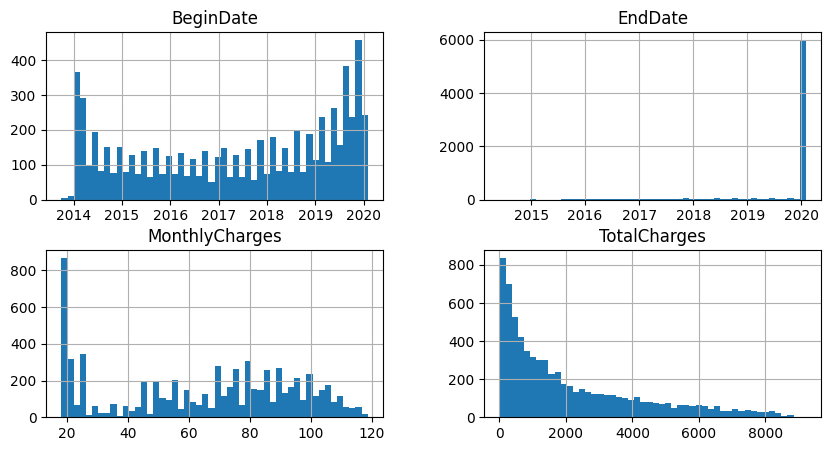

In [24]:
# Построение гистограмм распределения числовых признаков
df.hist(figsize=(10,5), bins=50);

**Замечание:**  Значения признаков выглядят правдоподобно. 
Аномальных значений выявить не удалось. 

### Определим целевой признак.
На предыдущем этапе проекта мы заменили значения признака `EndDate` c "No" на "2020-02-01" по дате выгрузки. Таким образом клиентов с этой датой можно считать лояльными, а всех остальных ушедшими.

In [25]:
# Создание нового столбца - целевого признака
df.loc[df['EndDate'] == '2020-02-01', 'customer_leave'] = 0
df.loc[df['EndDate'] != '2020-02-01', 'customer_leave'] = 1
df['customer_leave'] = df['customer_leave'].astype(int)
df['customer_leave'].value_counts()

0    5942
1    1101
Name: customer_leave, dtype: int64

**Замечание:**  Мы создали новый столбец `customer leave`, где 0 - клиент лоялен и 1 - клиент ушёл.

### Создадим новые признаки для прогнозирования оттока клиентов.
Для улучшения прогноза будущей модели добавим в таблицу информацию о том, какое врямя человек является или являлся клиентом "телеком" компании. Для этого из конечной даты вычтем дату заключения договора с клиентом. Длительность взаимоотношений клиента с компанией будем считать в днях.  
В принципе эту же информацию можно было бы получить путём деления `TotalCharges` на `MonthlyCharges`.  Но наш способ будет немного точнее.

In [26]:
# Создание нового признака
df['duration_day'] = (df['EndDate'] - df['BeginDate']) / np.timedelta64(1, 'D')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

**Замечание:**  Пропусков нет, формат данных - верный.

**Вывод:**  

После этапа предобработки данных у нас получилась таблица из 22 столбцов и 7043 строк.

## Исследовательский анализ данных

### Рассчитаем корреляцию Пирсона в данных.

In [27]:
# Функция вывода корреляции Пирсона с импользованием различных цветов в зависимости от значений
def pirson(data):
    return (data.corr().style.applymap(lambda v: 'opacity: 20%' if (v < 0.1) and (v > -0.1) 
                                       else 'opacity: 70%; color: green; background-color: yellow;')
                             .applymap(lambda v: None if (v < 0.3) and (v > -0.3) 
                                       else 'opacity: 100%; color: green; background-color: lawngreen;')
                             .applymap(lambda v: None if (v < 0.7) and (v > -0.7)
                                       else 'color: black; background-color: red;')
                             .applymap(lambda v: 'color: blue; background-color: orange;' if (v == 1) 
                                       else None))

In [28]:
pirson(df)

**Замечание:**  Корреляция Пирсона показывает линейную связь числовых признаков.  

Тип связей отображён цветами:
- жёлтый цвет - слабая связь,
- зелёный цвет - средняя связь,
- красный цвет - сильная связь.

![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)

Мы видим высокую корреляцию между признаками `duration_day` и `TotalCharges`, что вполне логично - чем больше человек является клиентом компании, тем больше денег он тратит.

### Рассчитаем Phik корреляцию для признаков.

In [29]:
# Функция вывода Phik корреляции с импользованием различных цветов в зависимости от значений
def phik(data):
    return (data.phik_matrix().style.applymap(lambda v: 'opacity: 20%' if (v < 0.1) and (v > -0.1)
                                              else 'opacity: 70%; color: green; background-color: yellow;')
                                    .applymap(lambda v: None if (v < 0.3) and (v > -0.3)
                                              else 'opacity: 100%; color: green; background-color: lawngreen;')
                                    .applymap(lambda v: None if (v < 0.7) and (v > -0.7)
                                              else 'color: black; background-color: red;')
                                    .applymap(lambda v: 'color: blue; background-color: orange;' if (v == 1)
                                              else None))

In [30]:
phik(df)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'customer_leave', 'duration_day']


**Замечание:**  Phik корреляция позволяет заметить нелинейную связь для всех типов данных.  

Тип связей отображён цветами:
- жёлтый цвет - слабая связь,
- зелёный цвет - средняя связь,
- красный цвет - сильная связь.

![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)


Весьма высокая корреляция заметна между признаками `BeginDate` и `duration_day`, что вполне естественно, ведь признак `duration_day` является производным от `BeginDate` и `EndDate`. То же самое касается признаков `EndDate` и `customer_leave`.
В дальнейшем от признаков дат мы откажемся, чтобы избежать утечки в данных при обучении моделей.

Кроме этого сильная корреляция наблюдается между признаками:

`BeginDate` и `Type`,  
`BeginDate` и `TotalCharges`,  
`MonthlyCharges` и `TotalCharges`,  
`MonthlyCharges` и `MultipleLines`,  
`MonthlyCharges` и `InternetService`,  
`MonthlyCharges` и `StreamingTV`,  
`MonthlyCharges` и `StreamingMovies`,  
`TotalCharges` и `duration_day`,  
`MultipleLines` и `InternetService`,  
`StreamingTV` и `StreamingMovies`.  
В принципе эти корреляционные связи выглядят вполне логичными. Далее в проекте мы исследуем некоторые из них более подробно.

С целевым признаком `customer_leave` сильной корреляции других признаков мы не видим.

### Рассмотрим баланс классов целевого признака `customer_leave`.

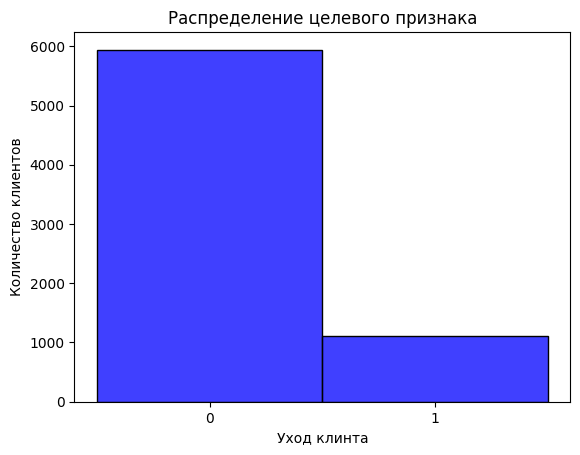

In [31]:
# Построение гистограммы распределения признака
sns.histplot(df['customer_leave'].astype(str), color='blue')
plt.title('Распределение целевого признака')
plt.xlabel('Уход клинта')
plt.ylabel('Количество клиентов');

In [32]:
pd.DataFrame({'Доля клиентов': df['customer_leave'].value_counts(normalize=True),
              'Количество клиентов' : df['customer_leave'].value_counts()})

Доля клиентов  Количество клиентов
0       0.843675                 5942
1       0.156325                 1101

**Замечание:** В данных наблюдается явный дисбаланс классов. Доля ушедших клиентов составляет 15%.

### Изучим распределение признаков.

In [33]:
# Создание функции для одновременного вывода графиков для численных признаков: гистограмма и "ящик с усами"
# с выводом информации о данных методом describe
def box_hist(col, color):
    '''
    col - признак (колонка таблицы)
    color - цвет графика
    '''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    x = sns.boxplot(col, ax=ax_box, color=color).set_title(f'Распределение значений признака {str(col.name)}', pad=20)
    y = sns.histplot(col, ax=ax_hist, color=color)
    ax_box.set(xlabel='')
    ax_hist.set(xlabel='Значения признака', ylabel='Количество клиентов')
    display(col.describe())

In [34]:
# Функция для построения гистограммы для категориальных признаков 
# с выводом  информации о данных методом value_counts
def hist(col, color):
    '''
    col - признак (колонка таблицы)
    color - цвет графика
    '''
    sns.histplot(col, bins=50, color=color);
    plt.title(f'Распределение значений признака {str(col.name)}');
    plt.xlabel('Значения признака');
    plt.ylabel('Количество клиентов');
    display(col.value_counts(ascending=False, normalize=True))

#### Посмотрим как распределяется признак `MonthlyCharges`.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

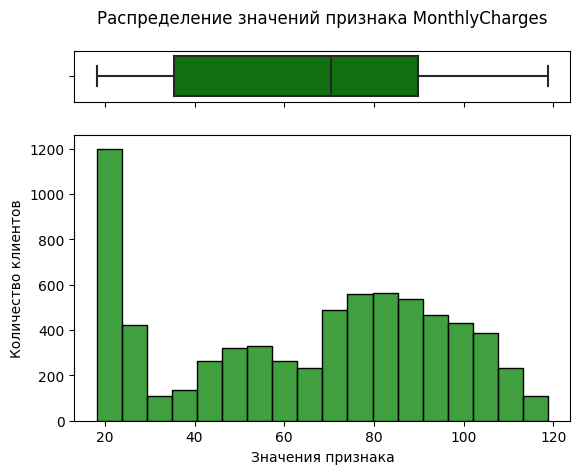

In [35]:
box_hist(df['MonthlyCharges'], 'green')

**Замечание:** Заметно высокая доля клиентов имеет ежемесячные траты в районе 20 денежных единиц. Вероятно компании следует больше предлагать дополнительные услуги клиентам.

#### Посмотрим как распределяется признак `TotalCharges`.

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64

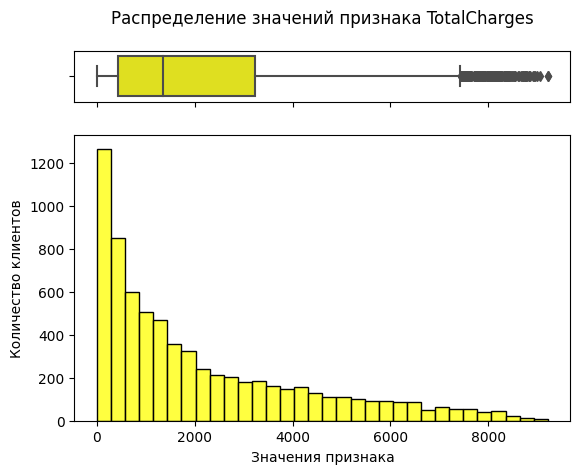

In [36]:
box_hist(df['TotalCharges'], 'yellow')

**Замечание:** Распределение данного признака выглядит адекватно. С ростом затрат количество клиентов падает. Довольно много клиентов с нулевыми тратами. Это объясняется тем, что это клиенты которые, недавно подключились к услугам компании и ещё не успели их оплатить.

#### Посмотрим как распределяется признак `duration_day`.

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration_day, dtype: float64

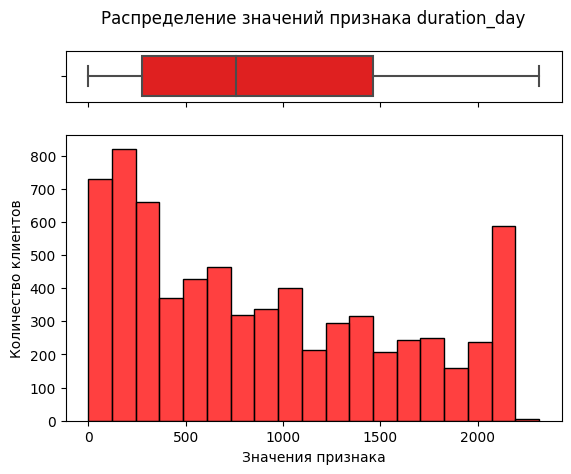

In [37]:
box_hist(df['duration_day'], 'red')

**Замечание:** По этим данным можно сделать вывод, что количество клиентов падает с ростом времени их отношения с компанией. Также заметен всплеск в районе 2000 дней. Это самые долгосрочные клиенты, пришедшие в первый год работы компании.

#### Посмотрим как распределяется признак `BeginDate`.

2014-02-01    0.051966
2019-10-01    0.033650
2019-09-01    0.033650
2019-11-01    0.033650
2020-01-01    0.033082
                ...   
2020-02-01    0.001562
2014-01-01    0.000994
2013-12-01    0.000426
2013-10-01    0.000426
2013-11-01    0.000284
Name: BeginDate, Length: 77, dtype: float64

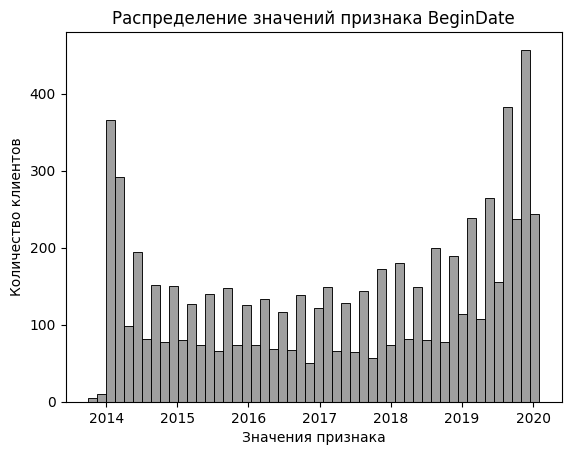

In [38]:
hist(df['BeginDate'], 'grey')

**Замечание:** По этому графику можно сделать вывод о том сколько новых клиентов привлекала компания с годами. После основания компании было резкое падение количества приходивших клиентов и до 2019 года остовалось на уровне. И начиная с 2019 года начался резкий рост этого количества.

#### Посмотрим как распределяется признак `EndDate`.

2020-02-01    0.843675
2020-01-01    0.005537
2019-12-01    0.005395
2018-11-01    0.004969
2019-09-01    0.004544
                ...   
2014-12-01    0.000284
2015-04-01    0.000284
2014-06-01    0.000142
2014-11-01    0.000142
2014-10-01    0.000142
Name: EndDate, Length: 67, dtype: float64

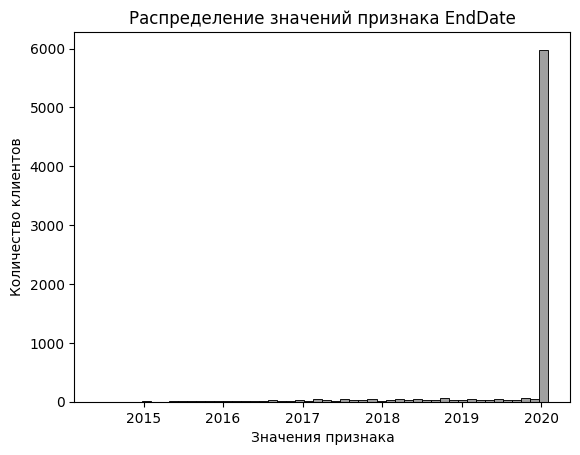

In [39]:
hist(df['EndDate'], 'grey')

**Замечание:** Здесь видно, что с годами клиенты стали уходить чаще. Видимо у компании до 2019 года дела шли не очень хорошо. Начиная с 2019 года ситуация улучшается. Заметный рост новых клиентов, а потери клиентов остаются на уровне. Большие показатели в районе 2020 года обозначает лояльных клиентов (2020-02-01 - дата выгрузки данных из базы).

#### Посмотрим как распределяется признак `Type`.

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Type, dtype: float64

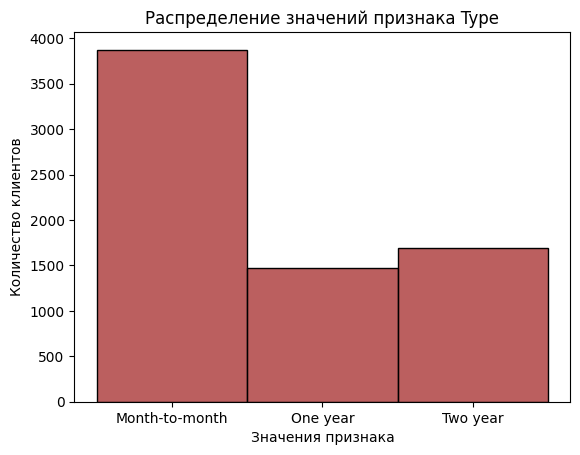

In [40]:
hist(df['Type'], 'brown')

**Замечание:** Большинство клиентов имеет договор оплаты по месяцам.

#### Посмотрим как распределяется признак `PaperlessBilling`.

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

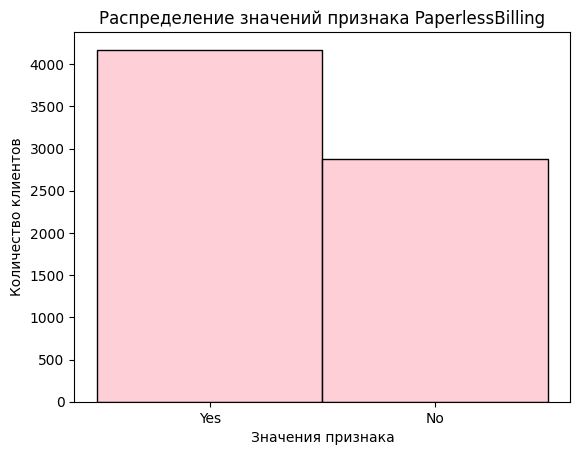

In [41]:
hist(df['PaperlessBilling'], 'pink')

**Замечание:** Клиентов предпочитающих безналичный расчёт больше остальных.

#### Посмотрим как распределяется признак `PaymentMethod`.

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

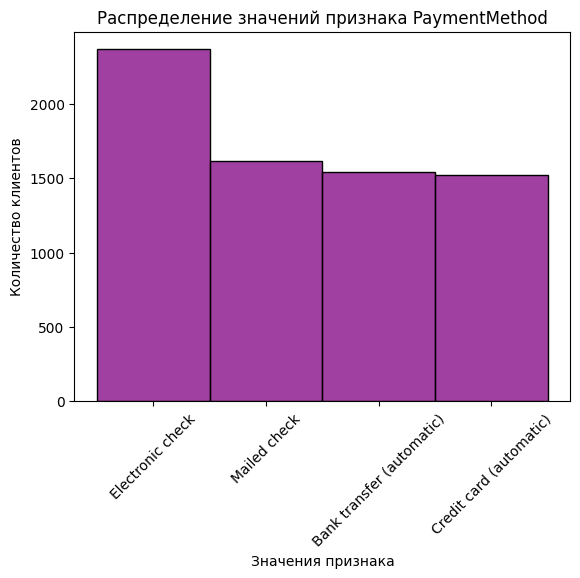

In [42]:
hist(df['PaymentMethod'], 'purple')
plt.xticks(rotation=45);

**Замечание:** Здесь видно способы оплаты услуг компании. `electronic check` - самый популярный.

#### Посмотрим как распределяется признак `gender`.

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

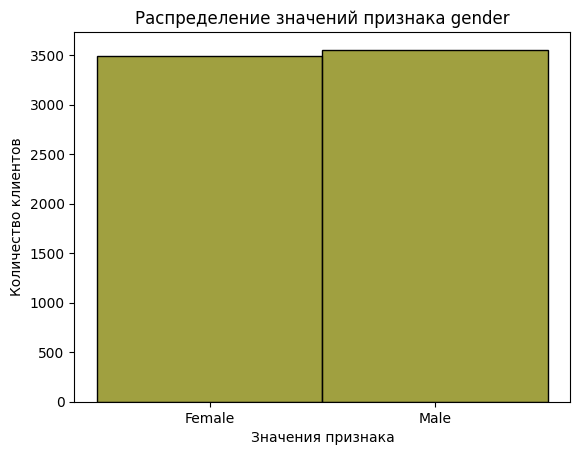

In [43]:
hist(df['gender'], 'olive')

**Замечание:** Мы наблюдаем примерно одинаковое количество мужчин и женщин среди клиентов компании.

#### Посмотрим как распределяется признак `SeniorCitizen`.

No     0.837853
Yes    0.162147
Name: SeniorCitizen, dtype: float64

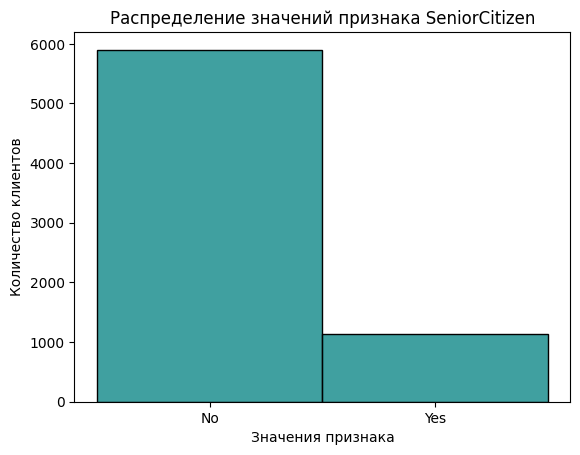

In [44]:
hist(df['SeniorCitizen'], 'teal')

**Замечание:** Людей обладающих пенсионным статусом заметно меньше, хотя и довольно большое количество.

#### Посмотрим как распределяется признак `Partner`.

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

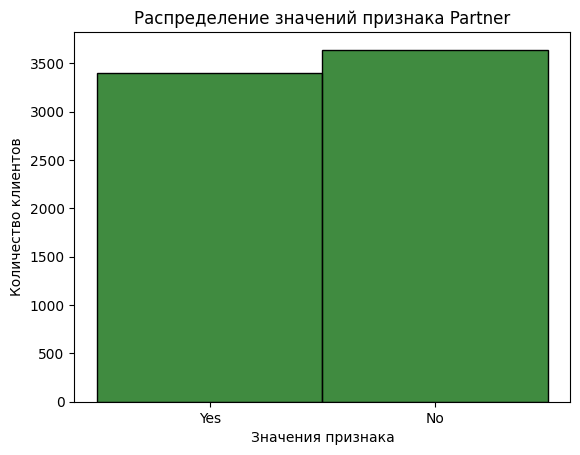

In [45]:
hist(df['Partner'], 'darkgreen')

**Замечание:** Количество людей находящихся в браке примерно равно холостым.

#### Посмотрим как распределяется признак `Dependents`.

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

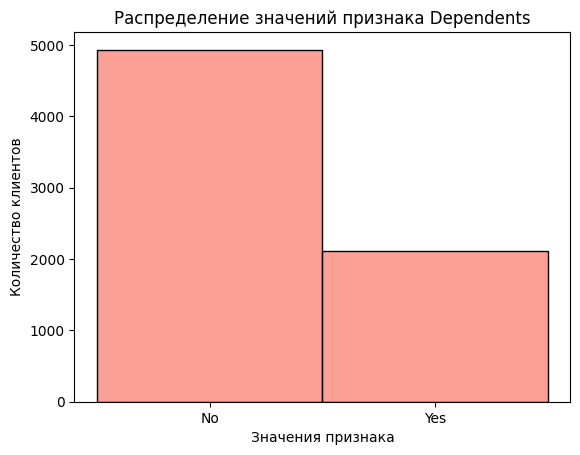

In [46]:
hist(df['Dependents'], 'salmon')

**Замечание:** Людей с иждивенцами значительно меньше.

#### Посмотрим как распределяется признак `MultipleLines`.

No          0.481329
Yes         0.421837
no_phone    0.096834
Name: MultipleLines, dtype: float64

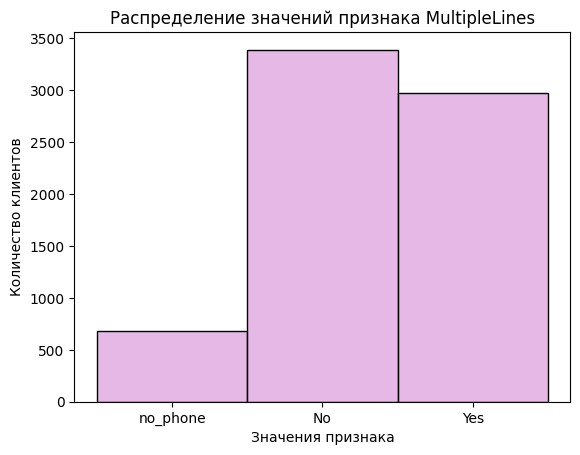

In [47]:
hist(df['MultipleLines'], 'plum')

**Замечание:** Около половины клиентов пользуются многоканальной связью. Есть и те кто не пользуется телефонной связью компании.

#### Посмотрим как распределяется признак `InternetService`.

Fiber optic    0.439585
DSL            0.343746
no_internet    0.216669
Name: InternetService, dtype: float64

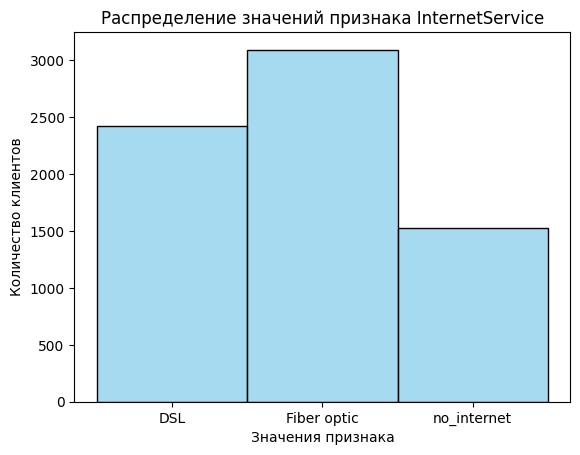

In [48]:
hist(df['InternetService'], 'skyblue')

**Замечание:** Оптоволоконная связь популярнее цифровой абонентской линии. Около 1500 клиентов не пользуются интернет услугами компании.

#### Посмотрим как распределяется признак `OnlineSecurity`.

No     0.713332
Yes    0.286668
Name: OnlineSecurity, dtype: float64

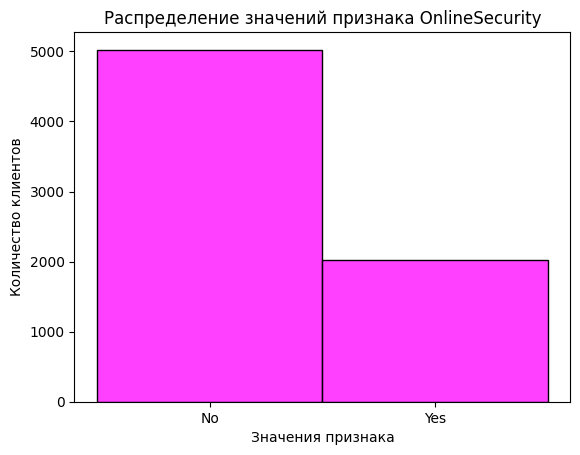

In [49]:
hist(df['OnlineSecurity'], 'magenta')

**Замечание:** 28% клиентов пользуются услугой блокировки небезопасных сайтов.

#### Посмотрим как распределяется признак `OnlineBackup`.

No     0.655119
Yes    0.344881
Name: OnlineBackup, dtype: float64

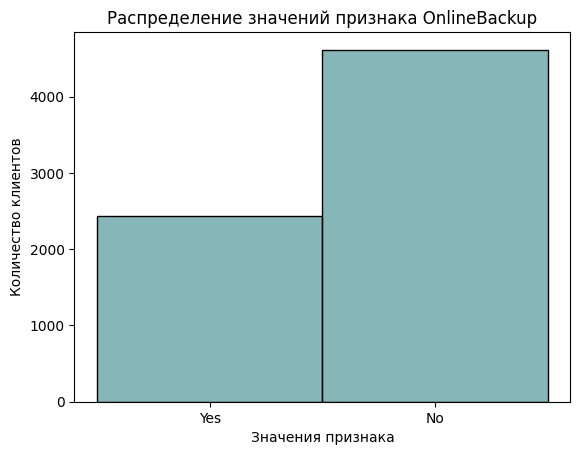

In [50]:
hist(df['OnlineBackup'], 'cadetblue')

**Замечание:** Облачным хранилищем для резервного копирования данных пользуется 34% клиентов.

#### Посмотрим как распределяется признак `DeviceProtection`.

No     0.656112
Yes    0.343888
Name: DeviceProtection, dtype: float64

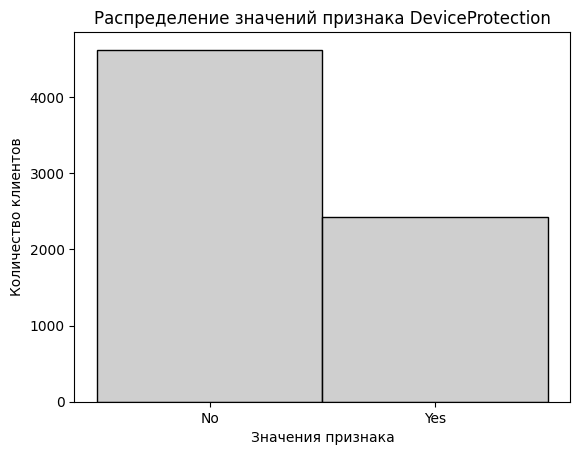

In [51]:
hist(df['DeviceProtection'], 'silver')

**Замечание:** Антивирусом данных пользуется 34% клиентов.

#### Посмотрим как распределяется признак `TechSupport`.

No     0.709783
Yes    0.290217
Name: TechSupport, dtype: float64

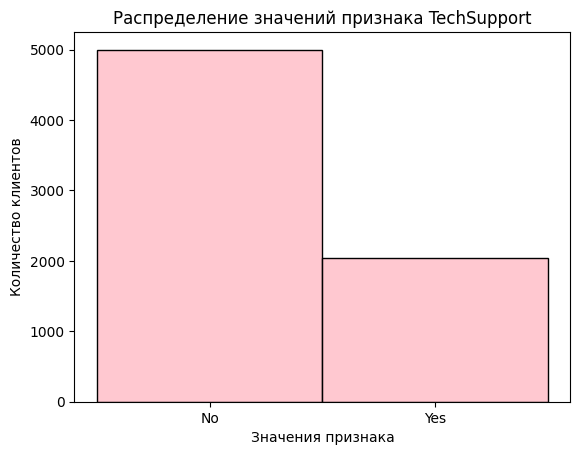

In [52]:
hist(df['TechSupport'], 'lightpink')

**Замечание:** Выделенной линией технической поддержки пользуется 29% клиентов.

#### Посмотрим как распределяется признак `StreamingTV`.

No     0.615647
Yes    0.384353
Name: StreamingTV, dtype: float64

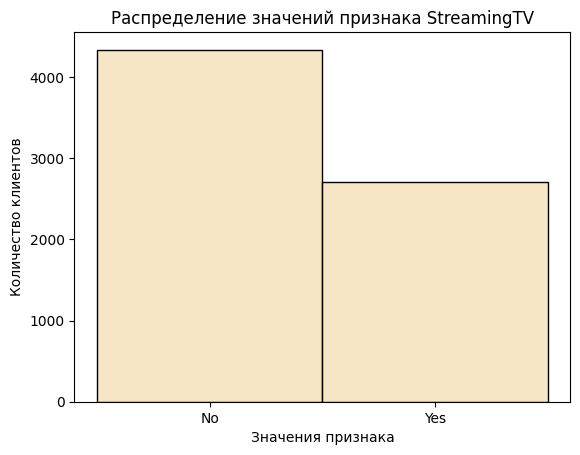

In [53]:
hist(df['StreamingTV'], 'wheat')

**Замечание:** Стриминговым телевидением пользуется 38% клиентов.

#### Посмотрим как распределяется признак `StreamingMovies`.

No     0.612097
Yes    0.387903
Name: StreamingMovies, dtype: float64

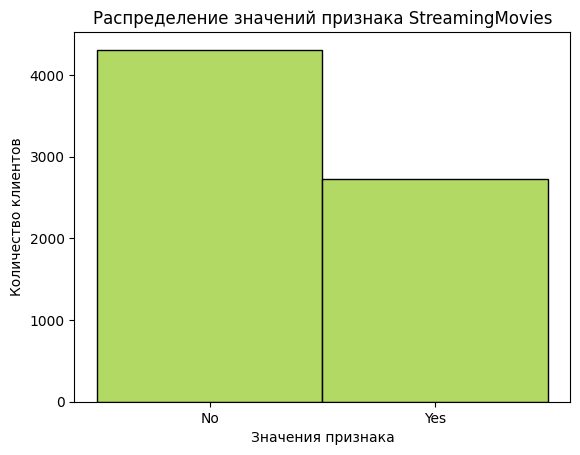

In [54]:
hist(df['StreamingMovies'], 'yellowgreen')

**Замечание:** Каталогом фильмов пользуется 38% клиентов.

### Выполним поиск зависимостей между признаками.
Рассмотрим наиболее выраженные связи между признаками.

#### Рассмотрим связь признаков `TotalCharges` , `duration_day` и `InternetService`.

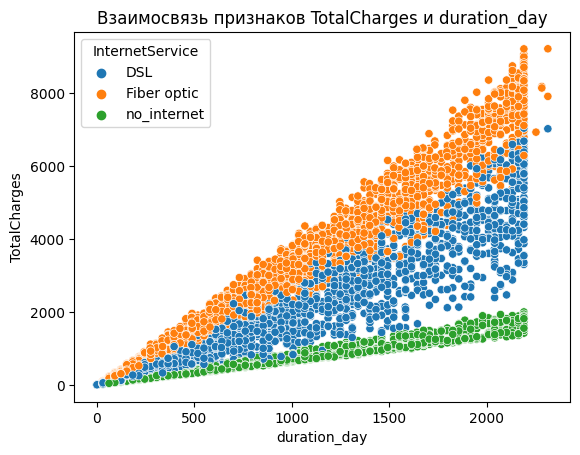

In [55]:
# Построение графика (категориальный признак добавляется через параметр "hue")
sns.scatterplot(data=df, x='duration_day', y='TotalCharges', hue='InternetService')
plt.title('Взаимосвязь признаков TotalCharges и duration_day');

**Замечание:** Общие затраты клиентов имеют линейную зависимость от длительности обслуживания. Это логично. На графике видно, что больший доход компании приносят услуги интернета (с типом связи оптоволокно).

#### Рассмотрим связь признаков `BeginDate` и `Type`.

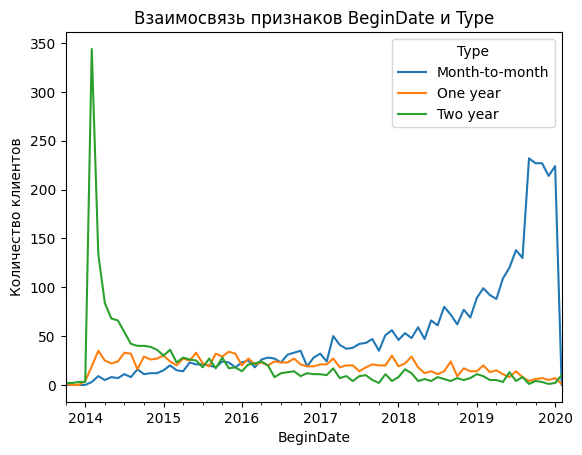

In [56]:
# Генерация кросс таблицы и построение графика
pd.crosstab(df.BeginDate, df.Type, normalize=False).plot();
plt.ylabel('Количество клиентов');
plt.title('Взаимосвязь признаков BeginDate и Type');

**Замечание:** Здесь видно как со временем росло число пользователей предпочитающих помесячную оплату услуг.

#### Рассмотрим связь признаков `MonthlyCharges` ,`TotalCharges` и `customer_leave`.

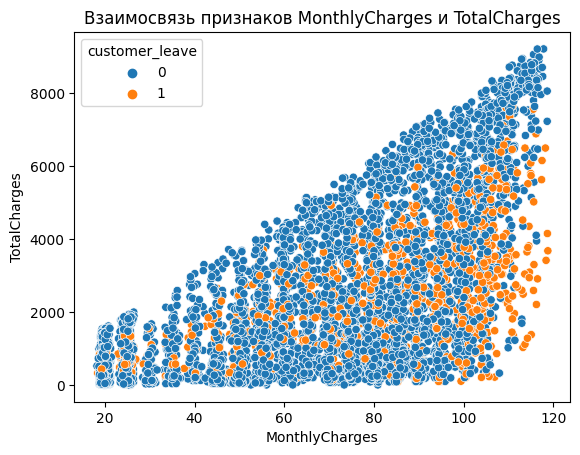

In [57]:
# Построение графика (категориальный признак добавляется через параметр "hue")
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='customer_leave')
plt.title('Взаимосвязь признаков MonthlyCharges и TotalCharges');

**Замечание:** На основе графика можно сделать, что нету сильной корреляции между рассмтриваемыми признаками. Следовательно для работы модели машинного обучения нужны оба признака. И нет смысла удалять один из них.

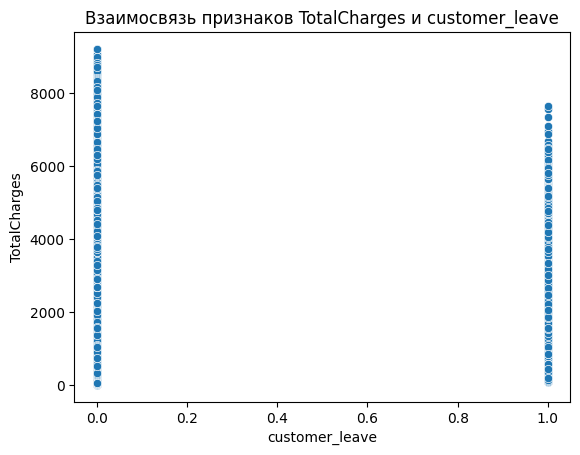

In [58]:
# Построение графика
sns.scatterplot(data=df, x='customer_leave', y='TotalCharges');
plt.title('Взаимосвязь признаков TotalCharges и customer_leave');

**Замечание:** Интересно, что среди клиентов с общими тратами больше 8000 нет ушедших.

#### Рассмотрим связь признаков `MultipleLines` и `InternetService`.

In [59]:
# Функция для вывода кросстаблицы признаков и столбчатой диаграммы по этой таблице
def crosstab_bar(col1, col2):
    pd.crosstab(col1, col2, normalize='index').plot(kind='bar')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title=col2.name)
    plt.ylabel('Доля клиентов');
    plt.title(f'Взаимосвязь признаков {col1.name} и {col2.name}');
    display(pd.crosstab(col1, col2, normalize='index'))

InternetService       DSL  Fiber optic  no_internet
MultipleLines                                      
No               0.309145     0.341593     0.349263
Yes              0.232582     0.652306     0.115113
no_phone         1.000000     0.000000     0.000000

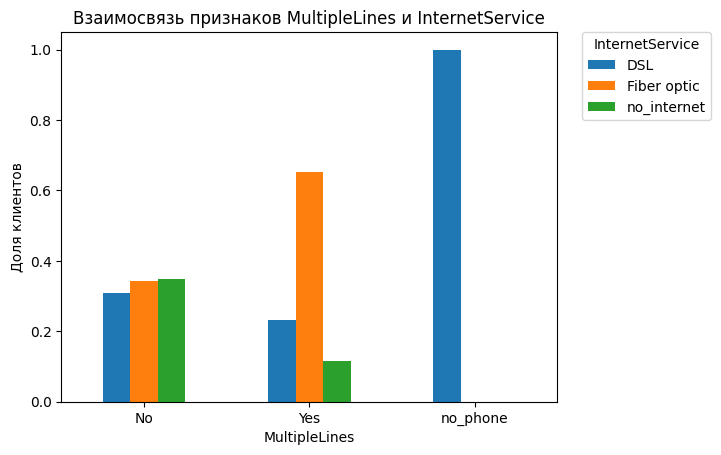

In [60]:
crosstab_bar(df['MultipleLines'], df['InternetService'])
plt.xticks(rotation=0);

**Замечание:** Заметим, что клиенты не пользующиеся телефоном покупают только интернет связь DSL. А клиеты использующие многоканальную телефонную связь предпочитают интернет связь через оптоволоконный кабель намного чаще чем через цифровую абонентскую линию.

#### Рассмотрим связь признаков `StreamingTV` и `StreamingMovies`.

StreamingMovies        No       Yes
StreamingTV                        
No               0.817343  0.182657
Yes              0.283339  0.716661

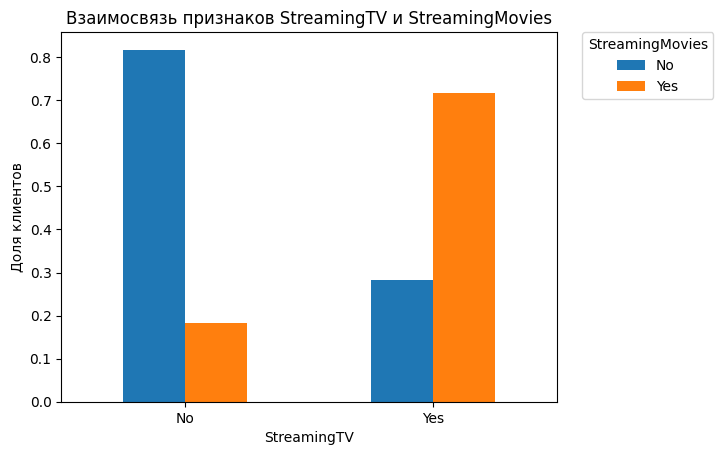

In [61]:
crosstab_bar(df['StreamingTV'], df['StreamingMovies'])
plt.xticks(rotation=0);

**Замечание:** Можно сделать вывод, что эти две услуги часто продаются вместе. В основном клиенты покупают либо обе опции сразу либо никакую из них.

#### Рассмотрим связь признаков `Type` и `customer_leave`.

customer_leave         0         1
Type                              
Month-to-month  0.894968  0.105032
One year        0.787508  0.212492
Two year        0.775221  0.224779

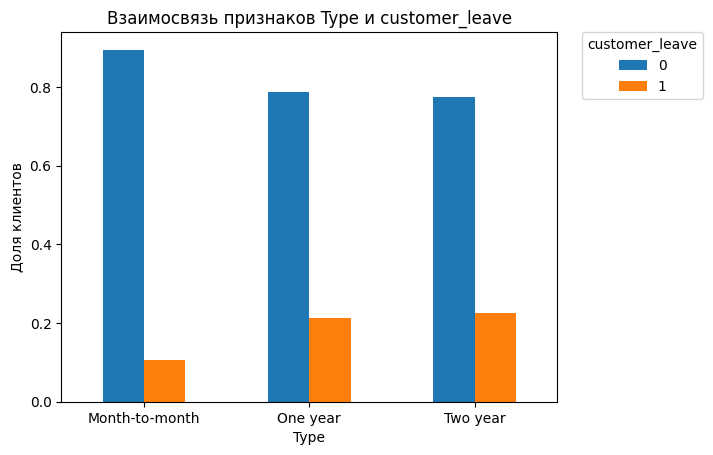

In [62]:
crosstab_bar(df['Type'], df['customer_leave'])
plt.xticks(rotation=0);

**Замечание:** Очевидно, что клиенты с помесячной оплатой уходят в 2 раза реже остальных.

#### Рассмотрим связь признаков `PaymentMethod` и `customer_leave`.

customer_leave                    0         1
PaymentMethod                                
Bank transfer (automatic)  0.794689  0.205311
Credit card (automatic)    0.791721  0.208279
Electronic check           0.852008  0.147992
Mailed check               0.927419  0.072581

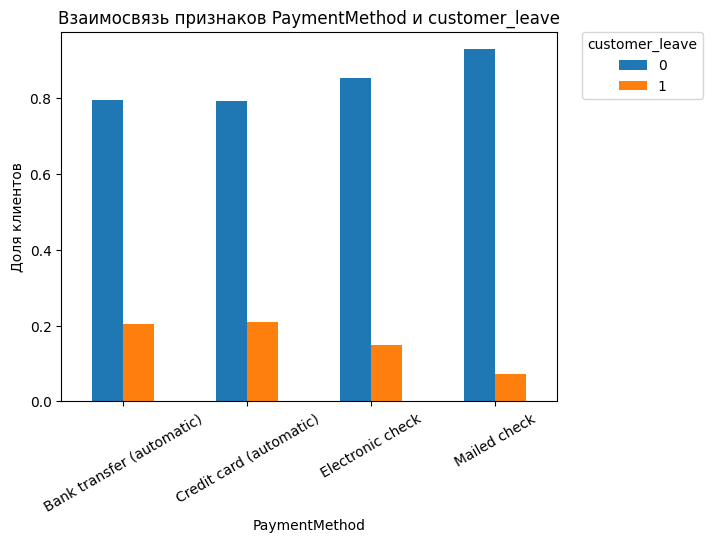

In [63]:
crosstab_bar(df['PaymentMethod'], df['customer_leave'])
plt.xticks(rotation=30);

**Замечание:** Здесь, мы видим, что клиенты с автоматической оплатой уходят заметно чаще остальных.

#### Рассмотрим связь признаков `Partner` и `customer_leave`.

customer_leave         0         1
Partner                           
No              0.895084  0.104916
Yes             0.788654  0.211346

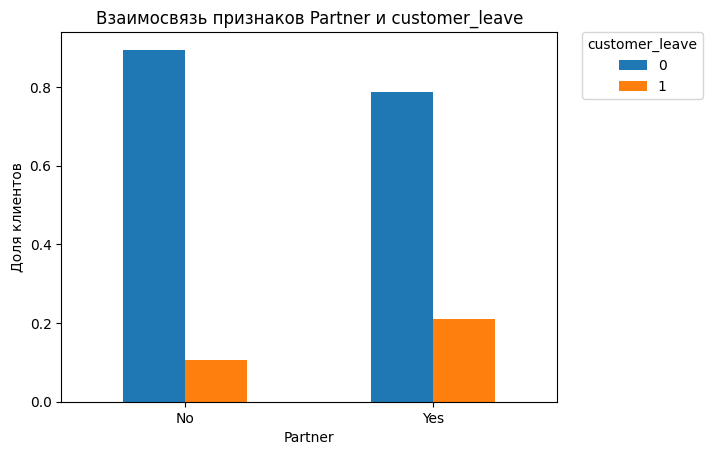

In [64]:
crosstab_bar(df['Partner'], df['customer_leave'])
plt.xticks(rotation=0);

**Замечание:** Заметим, что холостые клиенты уходят реже остальных.

#### Рассмотрим связь признаков `MultipleLines` и `customer_leave`.

customer_leave         0         1
MultipleLines                     
No              0.905605  0.094395
Yes             0.771794  0.228206
no_phone        0.848974  0.151026

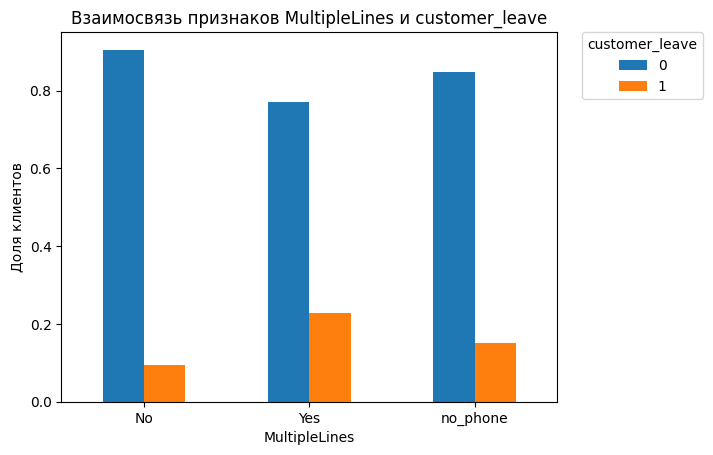

In [65]:
crosstab_bar(df['MultipleLines'], df['customer_leave'])
plt.xticks(rotation=0);

**Замечание:** Те клиенты, которые используют многоканальную тефонную связь, уходят намного чаще. 

#### Рассмотрим признаки `OnlineBackup`, `DeviceProtection`, `StreamingTV` , `StreamingMovies` и `customer_leave`.


customer_leave         0         1
OnlineBackup                      
No              0.882748  0.117252
Yes             0.769452  0.230548

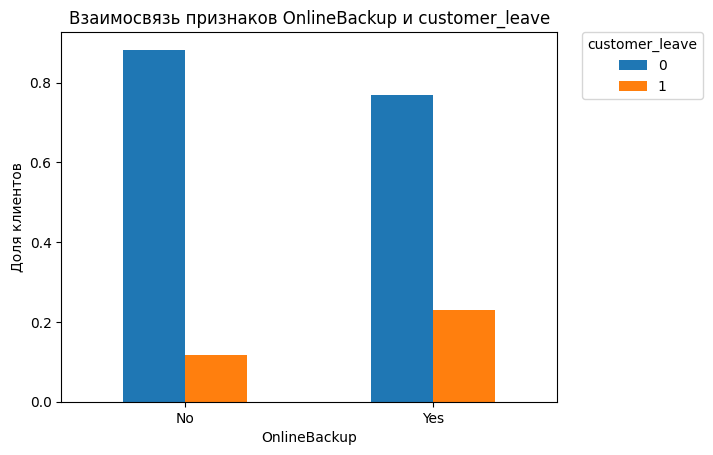

In [66]:
crosstab_bar(df['OnlineBackup'], df['customer_leave'])
plt.xticks(rotation=0);

customer_leave           0         1
DeviceProtection                    
No                0.880762  0.119238
Yes               0.772915  0.227085

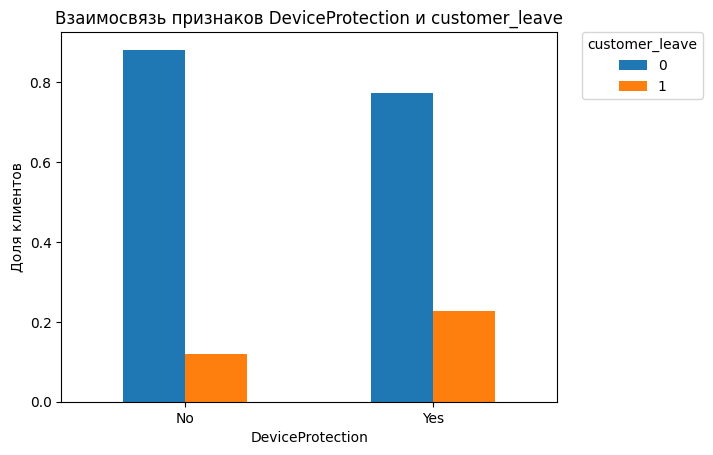

In [67]:
crosstab_bar(df['DeviceProtection'], df['customer_leave'])
plt.xticks(rotation=0);

customer_leave         0         1
StreamingTV                       
No              0.880766  0.119234
Yes             0.784263  0.215737

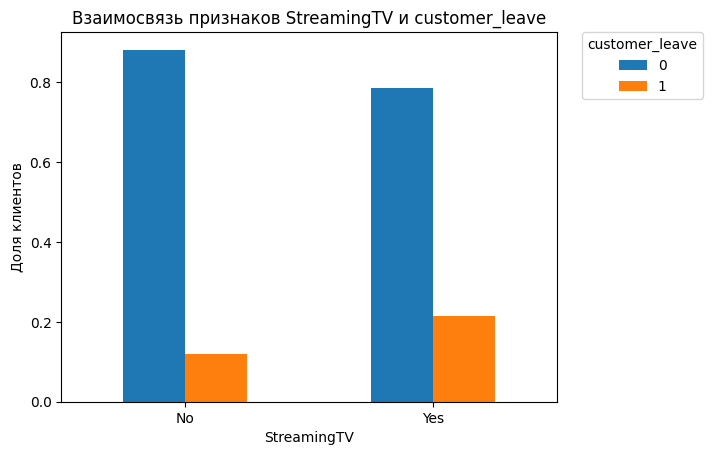

In [68]:
crosstab_bar(df['StreamingTV'], df['customer_leave'])
plt.xticks(rotation=0);

customer_leave          0         1
StreamingMovies                    
No               0.885177  0.114823
Yes              0.778184  0.221816

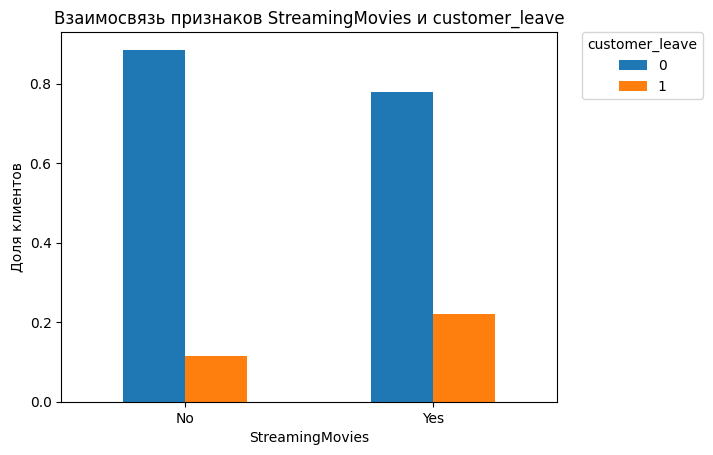

In [69]:
crosstab_bar(df['StreamingMovies'], df['customer_leave'])
plt.xticks(rotation=0);

**Замечание:** Пользователи этих интернет услуг уходят в 2 раза чаще.

**Вывод:**  

Мы нашли некоторые зависимости признаков. Однако, нужно помнить, что влияние различных факторов на целевую переменную -  это гипотеза. В идеале нужно использовать методы проверки гипотез. В данном проекте мы пропустим это действие.

## Подготовка данных для работы моделей машинного обучения

### Выделим целевой признак и признаки на основе которых будем строить модель машинного обучения.
Исключим из таблицы признаки `customerID`, `BeginDate`, `EndDate`.
Из признаков дат мы сгенерировали признак `duration_day` и целевой признак `customer_leave`. Если их оставить возникнет проблемма мультиколлинеарности и утечки данных.  
Признак `InternetService` сильно коррелирует с признаком `MonthlyCharges`. 
Чтобы уменьшить возможность переобучения исключим этот признак. 

In [70]:
# Создание переменных для целевого признака и для остальных признаков
target = df['customer_leave']
features = df.drop(['customerID', 'BeginDate', 'EndDate', 'customer_leave','InternetService'], axis=1)
print(target.shape)
print(features.shape)

(7043,)
(7043, 17)


### Разделим данные на тренировочную и тестовую выборки.

In [71]:
# Разбиение данных на 2 выборки: тренировочную и тестовую в соотношении 75:25
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=RANDOM_STATE)
print(f'Размер таблицы признаков тренировочной выборки: {features_train.shape}')
print(f'Размер таблицы целевого признака тренировочной выборки:{target_train.shape}')
print(f'Размер таблицы признаков тестовой выборки: {features_test.shape}')
print(f'Размер таблицы целевого признака тестовой выборки: {target_test.shape}')

Размер таблицы признаков тренировочной выборки: (5282, 17)
Размер таблицы целевого признака тренировочной выборки:(5282,)
Размер таблицы признаков тестовой выборки: (1761, 17)
Размер таблицы целевого признака тестовой выборки: (1761,)


### Выполним OHE кодирование категориальных признаков.
Для того чтобы не угодить в дамми-ловушку и не создать проблеммы мультиколлинеарности удалим для каждого признака по одному (первому) столбцу из полученных новых. 

In [72]:
# Преобразование категориальных признаков
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)
# Отображение таблицы для тренировочных данных
display(features_train_ohe.sample(5))
# Проверка совпадения признаков
features_train_ohe.columns == features_test_ohe.columns

MonthlyCharges  TotalCharges  duration_day  Type_One year  \
1662           69.75        591.48         245.0              0   
192            19.75       1362.75        2102.0              0   
1654           18.80         19.74          31.0              1   
2975           60.65        198.33          92.0              0   
1103          105.20       1893.60         550.0              1   

      Type_Two year  PaperlessBilling_Yes  \
1662              0                     1   
192               1                     0   
1654              0                     0   
2975              0                     0   
1103              0                     1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1662                                      0                               1   
192                                       0                               0   
1654                                      0                               0   
2975                                      0                               0   
1103                                      0                               1   

      PaymentMethod_Mailed check  gender_Male  ...  Partner_Yes  \
1662                           0            1  ...            0   
192                            0            0  ...            1   
1654                           1            1  ...            1   
2975                           1            1  ...            0   
1103                           0            1  ...            1   

      Dependents_Yes  MultipleLines_Yes  MultipleLines_no_phone  \
1662               0                  0                       0   
192                1                  0                       0   
1654               1                  0                       0   
2975               0                  0                       0   
1103               1                  1                       0   

      OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
1662                   0                 0                     0   
192                    0                 0                     0   
1654                   0                 0                     0   
2975                   0                 0                     0   
1103                   0                 1                     0   

      TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  
1662                0                0                    0  
192                 0                0                    0  
1654                0                0                    0  
2975                1                0                    1  
1103                1                1                    1  

[5 rows x 21 columns]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Замечание:** В итоге у нас получились 2 таблицы с тренировочной и тестовой выборкой. Признаки в обоих таблицах одинаковые.

### Выполним масштабирование признаков.
Для работы линейных моделей масштабирование может сыграть положительную роль.  
Для "деревянных" моделей масштабирование можно не проводить.  
Чтобы не допустить утечки данных обучим модель масштабирования только на тренировочных данных.

In [73]:
# Список признаков для масштабирования
numeric = ['MonthlyCharges','TotalCharges','duration_day']
# Создание объекта структуры масштабирования признаков (метод стандартизации)
scaler = StandardScaler()
# Настройка объекта на тренировочной выборке
scaler.fit(features_train_ohe[numeric])
features_train_scal = features_train_ohe.copy()
features_test_scal = features_test_ohe.copy()
# Приведение данных в выборках к одному масштабу
features_train_scal[numeric] = scaler.transform(features_train_ohe[numeric])
features_test_scal[numeric] = scaler.transform(features_test_ohe[numeric])
# Проверка полученных результатов
features_train_scal = pd.DataFrame(features_train_scal, columns=features_train_ohe.columns)
features_test_scal = pd.DataFrame(features_test_scal, columns=features_test_ohe.columns)
display(features_train_scal.head(5))
display(features_test_scal.head(5))

MonthlyCharges  TotalCharges  duration_day  Type_One year  \
6446        0.832674      1.452936      1.251417              1   
5306        0.626683     -0.883619     -1.197416              0   
2164        1.206449      2.603111      1.785043              0   
4076        1.148306      2.474754      1.785043              0   
883         1.543676      2.513528      1.652002              1   

      Type_Two year  PaperlessBilling_Yes  \
6446              0                     1   
5306              0                     1   
2164              1                     1   
4076              1                     1   
883               0                     1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6446                                      0                               0   
5306                                      0                               1   
2164                                      1                               0   
4076                                      1                               0   
883                                       0                               1   

      PaymentMethod_Mailed check  gender_Male  ...  Partner_Yes  \
6446                           0            1  ...            1   
5306                           0            1  ...            1   
2164                           0            1  ...            1   
4076                           0            1  ...            1   
883                            0            0  ...            1   

      Dependents_Yes  MultipleLines_Yes  MultipleLines_no_phone  \
6446               1                  1                       0   
5306               1                  1                       0   
2164               1                  0                       0   
4076               0                  1                       0   
883                0                  1                       0   

      OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
6446                   1                 1                     0   
5306                   0                 0                     0   
2164                   1                 1                     1   
4076                   1                 1                     1   
883                    1                 0                     1   

      TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  
6446                1                0                    0  
5306                0                0                    1  
2164                1                1                    0  
4076                0                1                    0  
883                 1                1                    1  

[5 rows x 21 columns]

MonthlyCharges  TotalCharges  duration_day  Type_One year  \
6551        1.037004      2.106105      1.472177              1   
5645        0.045256      0.990522      1.517499              1   
2783        0.973878      0.901937      0.583287              0   
4792        1.377554      2.570165      1.606680              1   
4422        1.070229      0.447090      0.004339              1   

      Type_Two year  PaperlessBilling_Yes  \
6551              0                     1   
5645              0                     1   
2783              0                     1   
4792              0                     1   
4422              0                     1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6551                                      0                               1   
5645                                      1                               0   
2783                                      0                               1   
4792                                      0                               1   
4422                                      0                               0   

      PaymentMethod_Mailed check  gender_Male  ...  Partner_Yes  \
6551                           0            0  ...            1   
5645                           0            1  ...            1   
2783                           0            0  ...            1   
4792                           0            0  ...            1   
4422                           0            1  ...            0   

      Dependents_Yes  MultipleLines_Yes  MultipleLines_no_phone  \
6551               0                  0                       0   
5645               0                  1                       0   
2783               0                  1                       0   
4792               0                  1                       0   
4422               0                  0                       0   

      OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
6551                   0                 1                     0   
5645                   1                 0                     0   
2783                   1                 1                     0   
4792                   0                 1                     1   
4422                   0                 1                     0   

      TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  
6551                0                1                    1  
5645                0                1                    0  
2783                0                0                    1  
4792                0                1                    1  
4422                0                1                    1  

[5 rows x 21 columns]

## Построение и анализ моделей машинного обучения
В данном разделе проекта мы будем обучать различные модели с перебором гиперпараметров.   

Подбор гиперпараметров моделей будем проводить с помощью модуля Optuna.    
Проверять качество моделей будем с помощью кросс - валидации.  
Балансировку классов будем проводить встроенными методами моделей машинного обучения.  

Для лучшей модели каждого типа будем строить кривые обучения и графики важности признаков.   
Признаки будем оценивать двумя способами: стандарной оценкой для каждого типа моделей `feature_importances_` и оценкой методом перестановки `permutation importance`.  
Обучение начнём с простой линейной модели. Её легче обучить и интерпретировать.  
Далее будем двигаться к более сложным моделям.  

Для удобства работы напишем различные функции.

In [74]:
# Функция для вычисления метрик и построения графиков
def metrics_graph(model, features, target, cv):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    cv - количество фолдов в методе кросс-валидации
    '''
    # Предсказание целевого признака
    predict = cross_val_predict(model,
                                features,
                                target_train,
                                cv=cv) 
    # Рассчёт метрик качества модели
    scores = cross_validate(model,
                            features,
                            target,
                            cv=cv,
                            scoring=['roc_auc','precision', 'recall', 'accuracy'])
    roc_auc = scores['test_roc_auc'].mean()
    recall = scores['test_recall'].mean()
    precision = scores['test_precision'].mean()
    accuracy = scores['test_accuracy'].mean()
    # Стиль заголовка
    styles = [dict(selector="caption", props=[("font-size", "120%"),
                                              ("font-weight", "bold")])]
    # Матрица ошибок
    display(pd.DataFrame(data=confusion_matrix(target, predict),
                         index=['Target_0','Target_1'],
                         columns=['Predict_0','Predict_1']))
    # Вывод на экран метрик      
    display(pd.DataFrame(data=[recall,
                               precision,
                               accuracy],
                         index=['Полнота','Точность','Accuracy'],
                         columns=['Значения метрик']))
    # Рассчёт вероятностей классов
    probabilities_valid = cross_val_predict(model, features, target, cv=cv, method='predict_proba')
    # Сохранение в переменную вероятностей класса "1"
    probabilities_one_valid = probabilities_valid[:,1]
    # Вывод ROC-кривой и метрики AUC-ROC
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC-ROC: {roc_auc.round(5)}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC-кривая')
    plt.legend(loc=4)
    plt.show() 

In [75]:
# Функция построения графика кривой обучения
def plot_learning_curves(model, features, target, cv):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    cv - количество фолдов в методе кросс-валидации
    '''   
    # Рассчёт параметров для построения кривой обучения
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=features,
                                                            y=target,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            cv=cv,
                                                            scoring="roc_auc",
                                                            random_state=RANDOM_STATE)
    # Рассчёт среднего значения метрик для фолдов кросс-валидации                                                           
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    # Построение интерактивного графика
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_sizes,
                             y=train_mean,
                             name="Training AUC-ROC",
                             mode="lines",
                             line=dict(color="blue")))
    fig.add_trace(go.Scatter(x=train_sizes,
                             y=test_mean,
                             name="Validation AUC-ROC",
                             mode="lines",
                             line=dict(color="green")))
    fig.update_layout(title="Кривые обучения",
                      xaxis_title="Размер выборки",
                      yaxis_title="AUC-ROC")
    fig.show()

In [76]:
# Функция построения графика коэффициентов для линейной модели
def plot_coefficients(model, features, target):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    '''      
    # Обучение модели
    model.fit(features, target)
    # Получение коэффициентов линейной модели
    coefficients = model.coef_[0]
    # Создание таблицы со значениями коэффициентов и названиями признаков
    feature_importance = pd.DataFrame({'Feature': features.columns, 'Coefficients': coefficients})
    # Сортировка значений по убыванию
    feature_importance = feature_importance.sort_values('Coefficients', ascending=True)
    # Построение столбчатого горизонтального графика
    feature_importance.plot(x='Feature',
                            y='Coefficients',
                            kind='barh',
                            figsize=(10, 4.5),
                            label='_nolegend_');
    plt.xlabel('Коэффициенты')
    plt.ylabel('Признаки')
    plt.title('Коэффициенты линейной модели')

In [77]:
# Функция построения графика важности признаков методом "feature_importances_" 
# Функция работает для моделей RandomForest, Light GBM и CatBoost
def plot_feature_importance(model, features, target):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    '''     
    # Обучение модели
    model.fit(features, target)
    # Получение значений важности признаков для модели машинного обучения
    feature_importance = pd.Series(model.feature_importances_, features.columns)
    # Сортировка значений по убыванию
    feature_importance = feature_importance.sort_values(ascending=True)
    # Построение столбчатого горизонтального графика
    feature_importance.plot(kind='barh',
                            figsize=(10, 4.5));
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature importance')

In [78]:
# Функция построения графика важности признаков методом "permutation_importance" 
def plot_permutation_importance(model, features, target):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    '''     
    # Получение значений важности признаков для модели машинного обучения
    result = permutation_importance(model,
                                    features,
                                    target,
                                    scoring='roc_auc',
                                    n_repeats=10,
                                    random_state=RANDOM_STATE)
    # Создание таблицы со значениями коэффициентов, стандартным отклонением и названиями признаков
    feature_importance = pd.DataFrame({'Feature': features_train_scal.columns,
                                       'Importance': result.importances_mean,
                                       'Standard Deviation': result.importances_std})
    # Сортировка значений по убыванию
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    # Построение столбчатого горизонтального графика
    feature_importance.plot(x='Feature',
                            y='Importance',
                            kind='barh',
                            figsize=(10, 4),
                            yerr='Standard Deviation',
                            capsize=5,
                            label='_nolegend_');
    plt.xlabel('Decrease in AUC-ROC')
    plt.ylabel('Features')
    plt.title('Permutation importance with standard deviation')

### Исследуем модель логистической регрессии `LogisticRegression`.

Для логистической регрессии важность признаков можно оценить значениями коэффициентов весов. Для сравнения, как альтернативу этому способу, будем использовать метод перестановки `permutation_importance`(универсальный метод для всех типов моделей из `sklearn`).

Метод `permutation_importance` показывает насколько снижается ключевая метрика при перемешивании значений каждого из признаков до момента предсказания модели.

**Замечание:** Гиперпараметры лучшей модели:
`penalty: l2`, `solver: lbfgs`, `max_iter: 5249`

Predict_0  Predict_1
Target_0       3091       1345
Target_1        295        551

Значения метрик
Полнота          0.651300
Точность         0.290616
Accuracy         0.689511

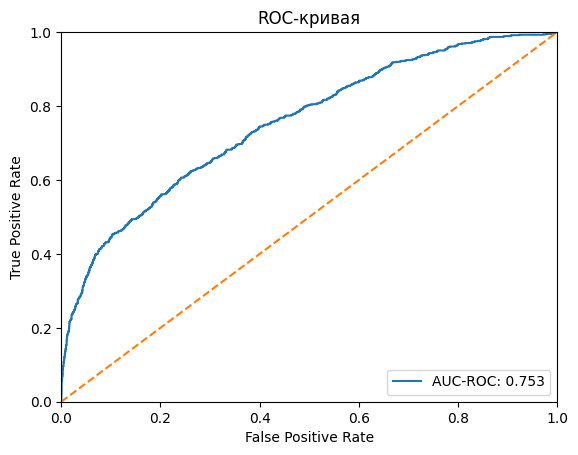

In [79]:
# Сохранение модели с наиболее удачными гиперпараметрами в переменную
best_model_1 = LogisticRegression(penalty='l2',
                                  max_iter=5249,
                                  solver='lbfgs',
                                  class_weight='balanced',
                                  random_state=RANDOM_STATE)
# Рассчёт метрик и вывод графиков
metrics_graph(best_model_1, features_train_scal, target_train, 3)

**Замечание:**  Результат лучшей модели: `AUC-ROC: 0,753`

In [80]:
# Построение кривых обучения
plot_learning_curves(best_model_1, features_train_scal, target_train, cv=5)

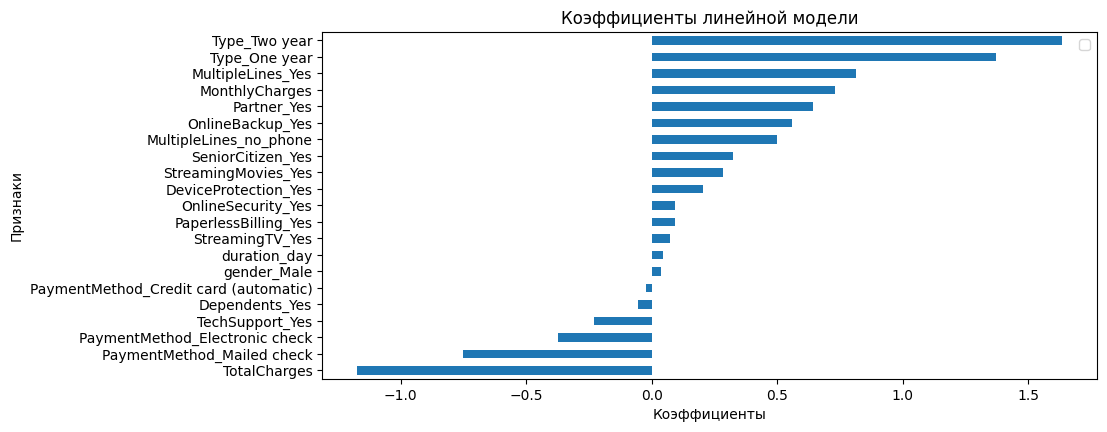

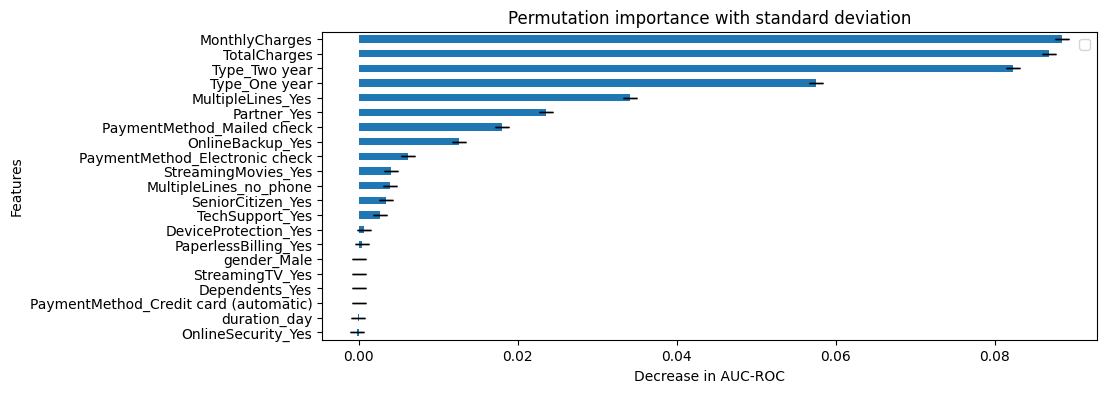

In [81]:
# Построение графика с коэффициентами линейной модели
plot_coefficients(best_model_1, features_train_scal, target_train)
# Построение графика "Permutation importance"
plot_permutation_importance(best_model_1, features_train_scal, target_train)

**Замечание:**  После перебора гиперпараметров мы получили лучшую модель данного типа. Для неё рассчитали различные метрики и построили графики.  

На кривой обучения мы не видим переобучения модели. Качество на валидации все ещё немного улучшается. Но не существенно.  
Также можно выделить наиболее важные признаки для работы данной модели. Для разных способов оценки они различаются. Наибольший вклад вносят признаки: `TotalCharges`, `MonthlyCharges`, `Type_Two year`, `Type_One year`, `MultipleLines_Yes`, `Partner_Yes`. 

Однако, целевая метрика модели `AUC-ROC = 0,753` ниже ожидаемой (`0,85`). Это можно объяснить нелинейными связями между признаками (см. пункт 3.2 Phik - корреляция). Далее перейдём к ансамблевым методам машинного обучения.

### Исследуем модель случайного леса `RandomForestClassifier`.

Для данной модели важность признаков будем оценивать методами `feature_importances_` и `permutation_importance`.

**Замечание:** Гиперпараметры лучшей модели:
`criterion: gini`, `max_depth: 7`, `n_estimators: 485`

Predict_0  Predict_1
Target_0       3461        975
Target_1        297        549

Значения метрик
Полнота          0.648936
Точность         0.360348
Accuracy         0.759182

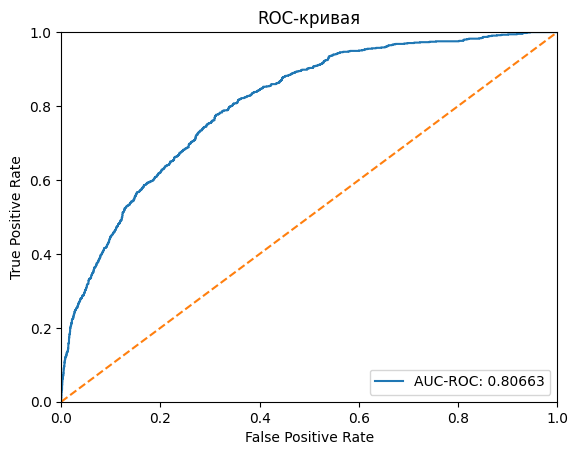

In [82]:
# Сохранение модели с наиболее удачными гиперпараметрами в переменную
best_model_2 = RandomForestClassifier(criterion='gini',
                                      max_depth=7,
                                      n_estimators=485,
                                      class_weight='balanced',
                                      random_state=RANDOM_STATE)
# Рассчёт метрик и вывод графиков
metrics_graph(best_model_2, features_train_ohe, target_train, 3)

**Замечание:**  Результат лучшей модели: `AUC-ROC: 0,80663`

In [83]:
# Построение кривых обучения
plot_learning_curves(best_model_2, features_train_ohe, target_train, cv=5)

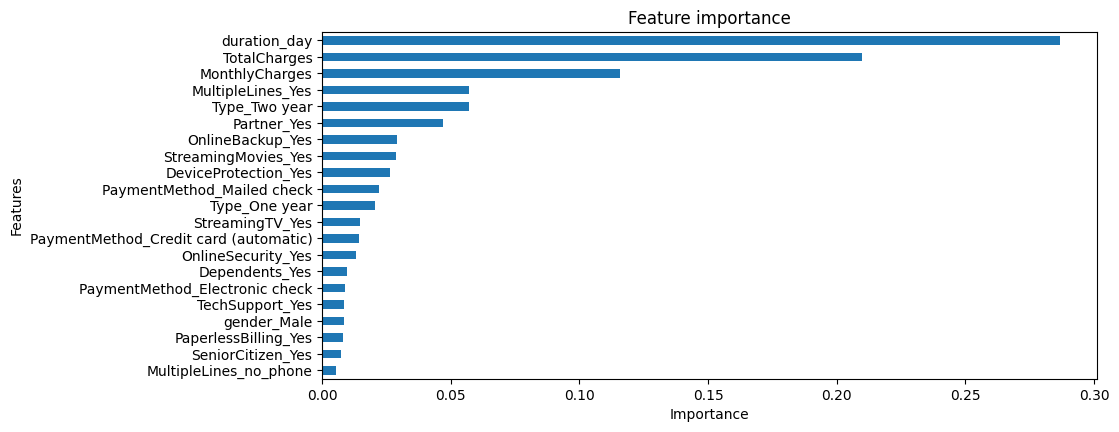

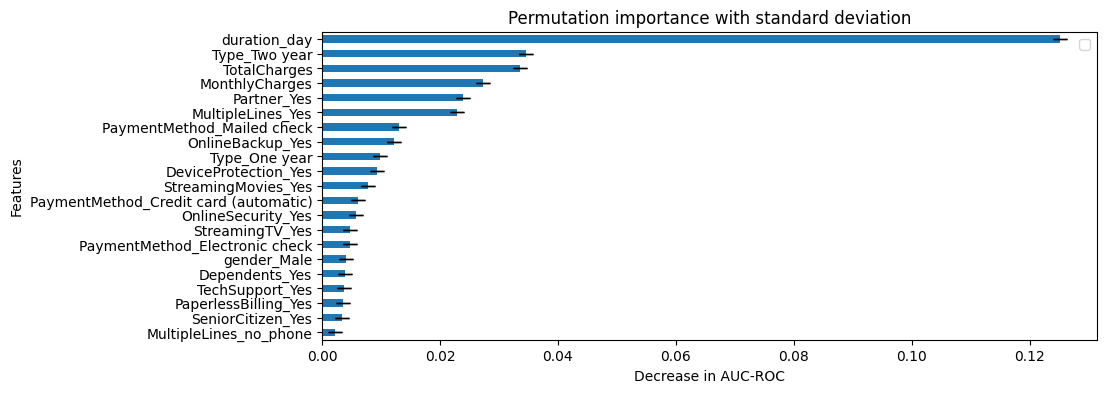

In [84]:
# Построение графика "Feature importance"
plot_feature_importance(best_model_2, features_train_ohe, target_train)
# Построение графика "Permutation importance"
plot_permutation_importance(best_model_2, features_train_ohe, target_train)

**Замечание:**  После перебора гиперпараметров мы получили лучшую модель данного типа. Для неё рассчитали различные метрики и построили графики.  

На кривой обучения качество модели на валидации выровнялось и начинает немного падать. Возможно начинается переобучение модели.  
Также можно выделить наиболее важные признаки для работы данной модели. Для разных способов оценки они различаются. Наибольший вклад вносят признаки: `duration_day`, `TotalCharges`, `MonthlyCharges`, `Type_Two year`, `MultipleLines_Yes`, `Partner_Yes`. 

Целевая метрика модели `AUC-ROC = 0,806` ниже ожидаемой (`0,85`). Поэтому перейдём к моделям работающим на основе градиентного бустинга.

### Исследуем модель `LightGBMClassifier`.

Для данной модели важность признаков будем оценивать методами `feature_importances_` и `permutation_importance`.

**Замечание:** Гиперпараметры лучшей модели:
`boosting_type: gbdt`, `learning_rate: 0.19451219433232392`, `max_depth: 2`, `n_estimators: 613`

Predict_0  Predict_1
Target_0       3791        645
Target_1        234        612

Значения метрик
Полнота          0.723404
Точность         0.486873
Accuracy         0.833582

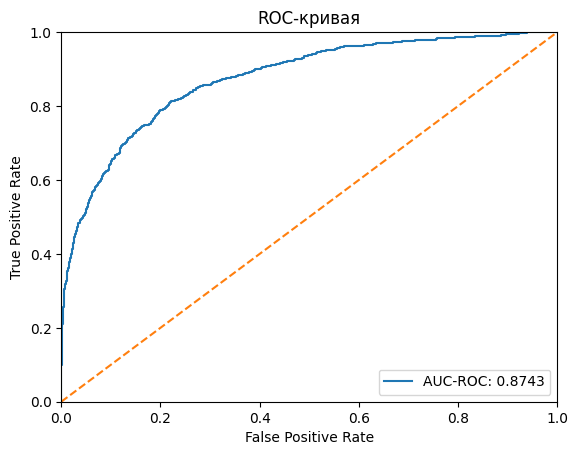

In [85]:
# Сохранение модели с наиболее удачными гиперпараметрами в переменную
best_model_3 = LGBMClassifier(boosting_type='gbdt',
                              learning_rate=0.19451219433232392,
                              max_depth=2,
                              n_estimators=613,
                              class_weight='balanced',
                              random_state=RANDOM_STATE)
# Рассчёт метрик и вывод графиков
metrics_graph(best_model_3, features_train_ohe, target_train, 3)

**Замечание:**  Результат лучшей модели: `AUC-ROC: 0,8743`

In [86]:
# Построение кривых обучения
plot_learning_curves(best_model_3, features_train_ohe, target_train, cv=5)

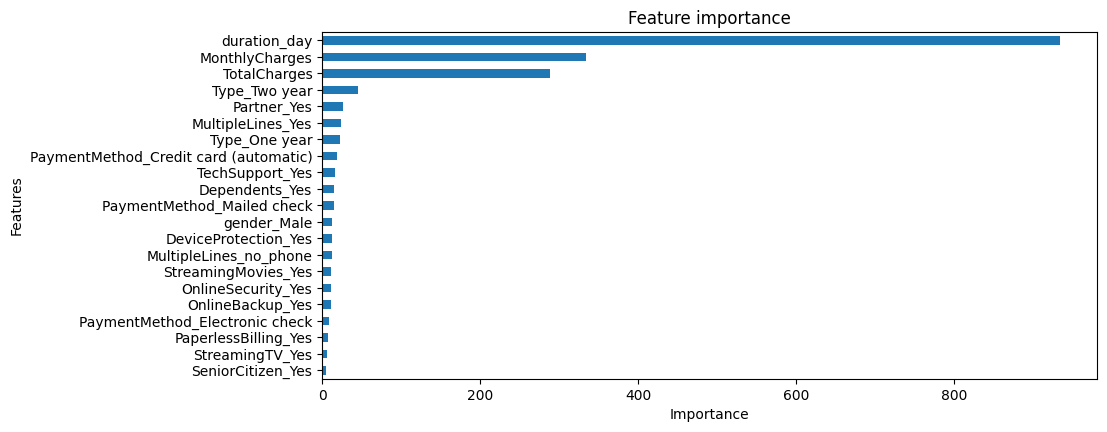

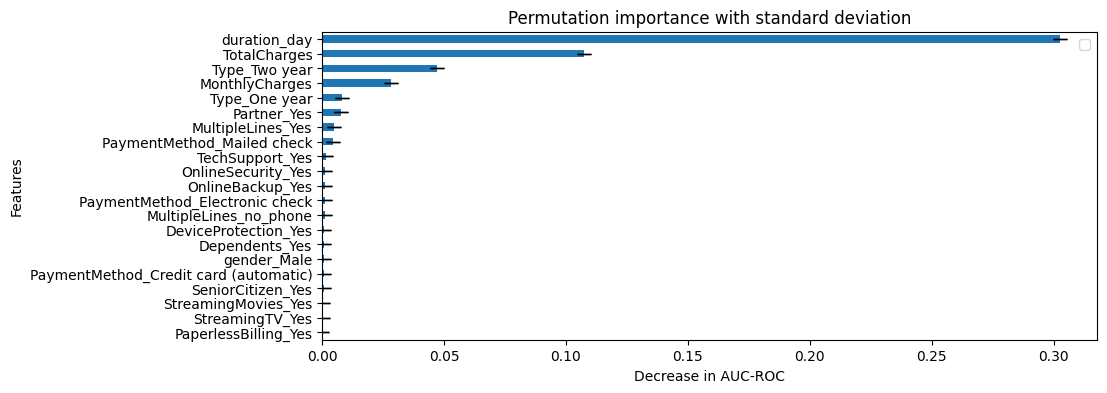

In [87]:
# Построение графика "Feature importance"
plot_feature_importance(best_model_3, features_train_ohe, target_train)
# Построение графика "Permutation importance"
plot_permutation_importance(best_model_3, features_train_ohe, target_train)

**Замечание:**  После перебора гиперпараметров мы получили лучшую модель данного типа. Для неё рассчитали различные метрики и построили графики.  

На кривой обучения качество модели на валидации продолжает расти. Ошибки на обучающих и валидационных данных постепенно сходятся. Это хорошая тенденция – если дальше двигаться направо (добавлять в модель данные), можно еще повысить качество на валидации.
Также можно выделить наиболее важные признаки для работы данной модели. Для разных способов оценки они различаются. Наибольший вклад вносят признаки: `duration_day`, `TotalCharges`, `MonthlyCharges`, `Type_Two year`. Есть небольшое сходство  в важности признаков с моделью `RandomForestClassifier`.

Целевая метрика модели `AUC-ROC = 0,8743` выше ожидаемой (`0,85`). Попробуем немного увеличить её используя другой тип модели градиентного бустинга.

### Исследуем модель `CatBoostClassifier`.

Для данной модели важность признаков будем оценивать методами `feature_importances_`  и `permutation_importance`.

Заметим, что для `CatBoostClassifier` существует метод `get_feature_importance`из `catboost`, который может выводить значения важности признаков рассчитанные различными способами (например `shap-values`).

**Замечание:** Гиперпараметры лучшей модели:
`learning_rate: 0.28855999420581974`, `depth: 3`, `iterations: 737`

Predict_0  Predict_1
Target_0       4107        329
Target_1        265        581

Значения метрик
Полнота          0.686761
Точность         0.638637
Accuracy         0.887542

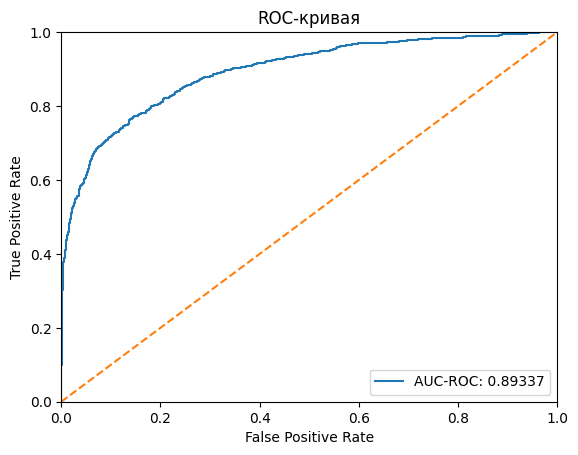

In [88]:
# Сохранение модели с наиболее удачными гиперпараметрами в переменную
best_model_4 = CatBoostClassifier(learning_rate=0.28855999420581974,
                                  depth=3,
                                  iterations=737,
                                  auto_class_weights='Balanced',
                                  random_state=RANDOM_STATE,
                                  verbose=False)
# Рассчёт метрик и вывод графиков
metrics_graph(best_model_4, features_train_ohe, target_train, 3)

**Замечание:** Результат лучшей модели: `AUC-ROC: 0,89337`

In [89]:
# Построение кривых обучения
plot_learning_curves(best_model_4, features_train_ohe, target_train, cv=5)

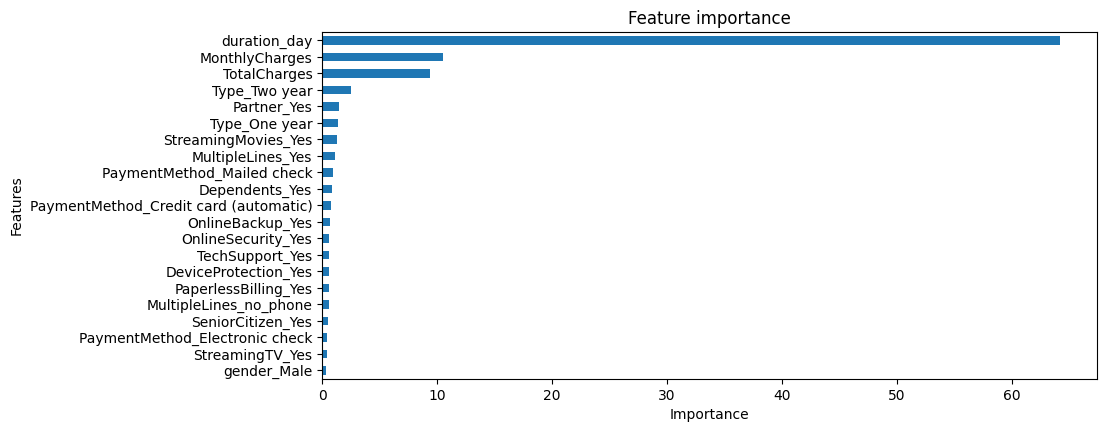

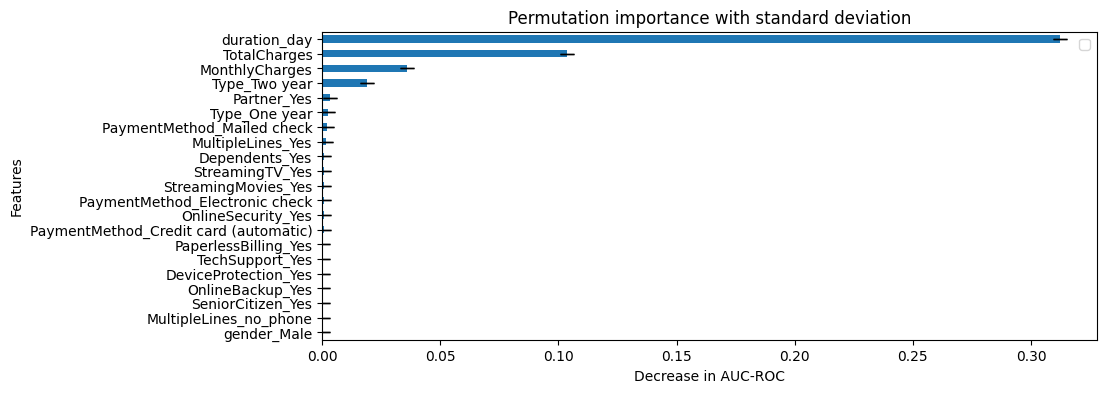

In [90]:
# Построение графика "Feature importance"
plot_feature_importance(best_model_4, features_train_ohe, target_train)
# Построение графика "Permutation importance"
plot_permutation_importance(best_model_4, features_train_ohe, target_train)

**Замечание:** После перебора гиперпараметров мы получили лучшую модель данного типа. Для неё рассчитали различные метрики и построили графики.  

На кривой обучения качество модели на валидации продолжает расти. Интересно, что метрика `AUC-ROC` на тренировочных данных практически равна 1 и не меняется с увеличением размера данных. Видимо модель идеально запоминает тренировочные данные. Качество модели на валидации продолжает улучшаться.
Скорее всего добавляя в модель данные, можно и дальше повышать её качество.
Также можно выделить наиболее важные признаки для работы данной модели. Для разных способов оценки они различаются. Наибольший вклад вносят признаки: `duration_day`, `TotalCharges`, `MonthlyCharges`, `Type_Two year`. Видно сильное сходство в важности признаков с моделью `LightGBMClassifier`.

Целевая метрика модели `AUC-ROC = 0,89337` выше ожидаемой (`0,85`). **Также данная модель показала лучшее качество среди исследуемых.** 

### Построим калибровочные кривые для моделей.

Все наши модели уже обучены (на всей тренировочной выборке) на этапе построения графиков важности признаков моделей (с помощью функций: `plot_coefficients` и `plot_feature_importance`).

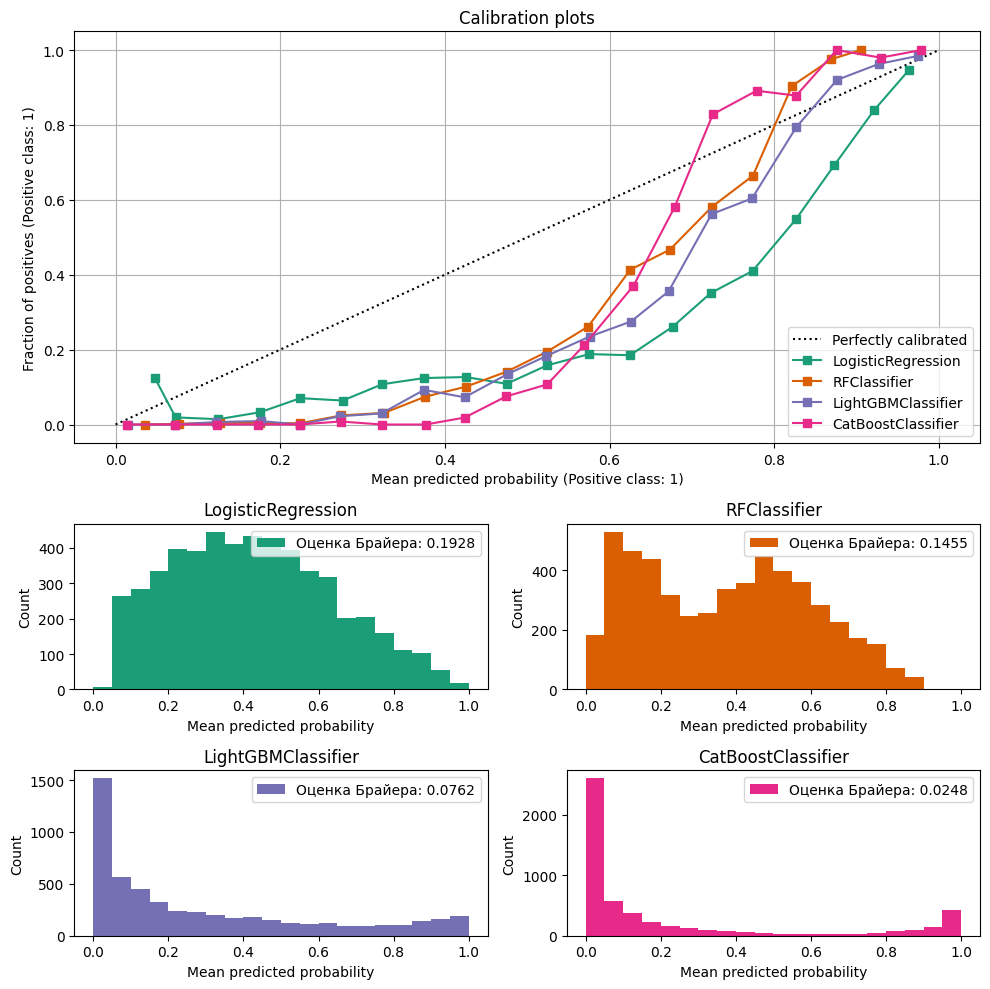

In [91]:
# Создание списка исследуемых моделей
clf_list = [(best_model_1, "LogisticRegression"),
            (best_model_2, "RFClassifier"),
            (best_model_3, "LightGBMClassifier"),
            (best_model_4, "CatBoostClassifier")]
# Разбиение всего пространство фигуры на строки и столбцы
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")
# Определение позиции графика калибровочных кривых в общем пространстве фигуры
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
# Построение калибровочных кривых для разных моделей и рассчёт оценки Брайера
calibration_displays = {}
brier_score = {}
for i, (clf, name) in enumerate(clf_list):
    if name == "LogisticRegression":
        display_сurve = CalibrationDisplay.from_estimator(clf,
                                                          features_train_scal,
                                                          target_train,
                                                          n_bins=20,
                                                          name=name,
                                                          ax=ax_calibration_curve,
                                                          color=colors(i))
        # Рассчёт вероятностей классов
        prob_pos = clf.predict_proba(features_train_scal)[:, 1]
        # Рассчёт оценки Брайера
        b_score = brier_score_loss(target_train, prob_pos)
    else:
        display_сurve = CalibrationDisplay.from_estimator(clf,
                                                          features_train_ohe,
                                                          target_train,
                                                          n_bins=20,
                                                          name=name,
                                                          ax=ax_calibration_curve,
                                                          color=colors(i))
        # Рассчёт вероятностей классов
        prob_pos = clf.predict_proba(features_train_ohe)[:, 1]
        # Рассчёт оценки Брайера
        b_score = brier_score_loss(target_train, prob_pos)
    calibration_displays[name] = display_сurve
    brier_score[name] = b_score
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
# Определение позиций гистограмм в общем пространстве фигуры
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# Построение гистограмм вместе оценкой Брайера
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    ax.hist(calibration_displays[name].y_prob,
            range=(0, 1),
            bins=20,
            label=f'Оценка Брайера: {round(brier_score[name], 4)}',
            color=colors(i))
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
    plt.legend(loc=1)
plt.tight_layout()
plt.show()

**Замечание:** Мы видим, как наши "лучшие" модели откалиброванны.  

Положение точек или кривой относительно диагонали может помочь интерпретировать вероятности.  
`Ниже диагонали`: Модель имеет завышенный прогноз; вероятности слишком велики.   
`Выше диагонали`: Модель имеет заниженный прогноз; вероятности слишком малы.   

На гистограммах мы видим как распределяются предсказания вероятностей у разных моделей. Модели градиентного бустинга наиболее "уверенные", так как, в основном, предсказывают вероятности близкие к 0 и 1.

Судя по оценке Брайера лучше всех откалиброванна модель `CatBoostClassifier`. Причём это значение очень близко к 0, что предполагает хорошую калибровку. 

Можно выполнить калибровку моделей. Но важно помнить, что лучше откалиброванные вероятности могут привести к ухудшению прогнозов (в зависимости от метрики). Кроме того, в нашей задаче бинарной классификации более важен сам факт "оттока" клиента (а не вероятность) и калибровка здесь скорее не нужна.

**Вывод:** 

Пр все показателям лидирует модель `CatBoostClassifier`.   
Примем её к итоговую и проверим качество модели на тестовых данных.

## Проверка "лучшей" модели

Лучшее качество показала модель `CatBoostClassifier` с гиперпараметрами: `learning_rate: 0.28855999420581974`, `depth: 3`, `iterations: 737`.

### Проверим качество модели `CatBoostClassifier` на тестовой выборке.
Наша "лучшая" модель уже обучена (на всей тренировочной выборке) на этапе построения графиков важности признаков моделей (с помощью функций `plot_feature_importance`).

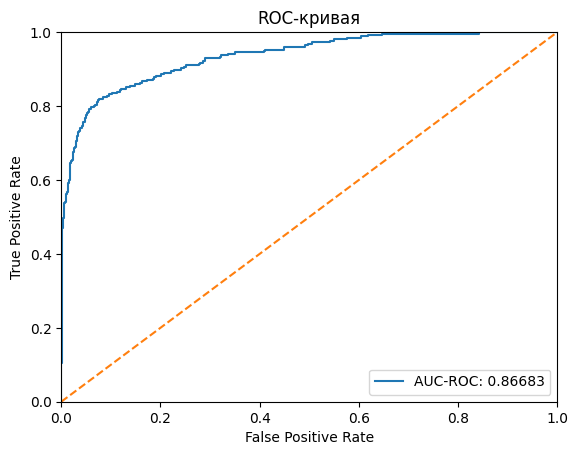

In [92]:
# Определение модели для тестирования
test_model = best_model_4
# Выполнение предсказания на тестовой выборке
predict_test = test_model.predict(features_test_ohe)
# Рассчёт метрики качества модели
roc_auc_test = roc_auc_score(target_test, predict_test)
recall_test = recall_score(target_test, predict_test)
precision_test = precision_score(target_test, predict_test)
accuracy_test = accuracy_score(target_test, predict_test)   
# Создание стиля заголовка
styles = [dict(selector="caption", props=[("font-size", "120%"),
                                          ("font-weight", "bold")])]
# Вывод на экран матрицы ошибок
display(pd.DataFrame(data=confusion_matrix(target_test, predict_test),
                     index=['Target_0','Target_1'],
                     columns=['Pred_0','Pred_1']).style.set_caption('Матрица ошибок')
                                                 .set_table_styles(styles))
# Вывод на экран метрик       
display(pd.DataFrame(data=[recall_test,
                           precision_test,
                           accuracy_test],
                     index=['Полнота','Точность','Accuracy'],
                     columns=['Значения метрик']).style.set_caption('Метрики качества модели')
                                                       .set_table_styles(styles))
# Рассчёт вероятностей классов
probabilities_valid_test = test_model.predict_proba(features_test_ohe)
# Сохранение в переменную вероятностей класса "1"
probabilities_one_valid_test = probabilities_valid_test[:,1]
# Вывод ROC-кривой и метрики AUC-ROC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_test)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC: {roc_auc_test.round(5)}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC-кривая')
plt.legend(loc=4)
plt.show() 

**Замечание:**  Результат модели на тестовой выборке: `AUC-ROC: 0,86683`. 

### Проверим модель на адекватность.
Для проверки на адекватность будем использовать наивную модель, которая будет предсказывать самый частый класс (в данном случае 0).  
Таким образом мы можем сравнить `Accuracy`.  
Для целевой метрики `AUC-ROC` смысла в этой проверке нет. Значение этой метрики для наивной модели будет равно около 0,5 (зависит  от типа предсказания `DummyClassifier`). На графиках "ROC - кривая" значение `AUC-ROC=0.5` отображается прямой пунктирной линией.

In [93]:
# Инициализация наивной моделиь с заданными гиперпараметрами
model_dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
# Обучение наивной модели на тренировочных данных
model_dummy.fit(features_train_ohe, target_train)
# Получение значения целевой переменной на тестовой выборке
dummy_predictions_test = model_dummy.predict(features_test_ohe)
# Проврка качества модели
dummy_accuracy_test = accuracy_score(target_test, dummy_predictions_test) 
dummy_roc_auc_test = roc_auc_score(target_test, dummy_predictions_test)
# Вывод на экран качества модели
print(f'Значение Accuracy на тестовой выборке: {dummy_accuracy_test}')
print(f'Значение AUC-ROC на тестовой выборке: {dummy_roc_auc_test}')

Значение Accuracy на тестовой выборке: 0.8551959114139693
Значение AUC-ROC на тестовой выборке: 0.5


**Замечание:**  Наивная модель значительно уступает в качестве построенной нами модели. Проверка на адекватность пройдена. 

### Оценим важность признаков для работы модели.

Для данной модели важность признаков будем оценивать методами `permutation_importance` и `shap` (значения Шепли).   
Сначала посмотрим как изменятся значения важности признаков `permutation_importance` на тестовой выборке.  
Далее будем использвать библиотеку `shap`. Она позволяет лучше интерпретировать работу модели.

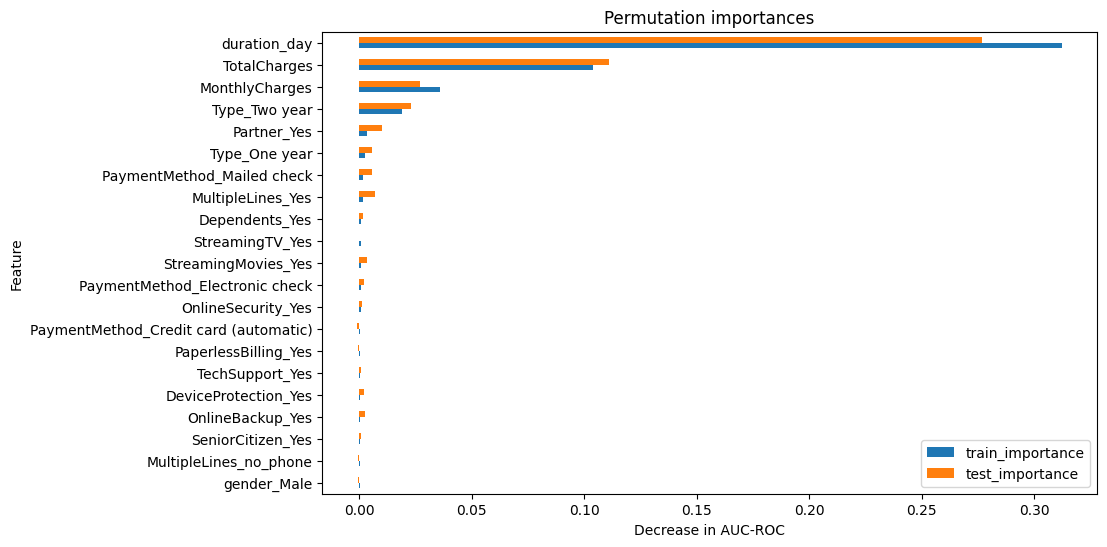

In [94]:
# Получение значений важности признаков для модели машинного обучения на тренировочных данных
train_results = permutation_importance(test_model,
                                       features_train_ohe,
                                       target_train,
                                       scoring='roc_auc',
                                       n_repeats=10,
                                       random_state=RANDOM_STATE)
# Получение значений важности признаков для модели машинного обучения на тестовых данных
test_results = permutation_importance(test_model,
                                      features_test_ohe,
                                      target_test,
                                      scoring='roc_auc',
                                      n_repeats=10,
                                      random_state=RANDOM_STATE)
# Создание таблицы со значениями коэффициентов и названиями признаков
feature_importance = pd.DataFrame({'Feature': features_train_scal.columns,
                                   'train_importance': train_results.importances_mean,
                                   'test_importance': test_results.importances_mean})
# Сортировка значений по убыванию
feature_importance = feature_importance.sort_values('train_importance', ascending=True)
# Построение столбчатого горизонтального графика
feature_importance.plot(kind='barh', x='Feature', figsize=(10, 6))
plt.xlabel('Decrease in AUC-ROC');
plt.title('Permutation importances');

**Замечание:**  Мы видим, что на тестовой выборке важность признаков `permutation_importance`изменяется. Например, снижается влияние признаков `duration_day` и `MonthlyCharges` на ключевую метрику `AUC-ROC`. А признаки `Partner_Yes`, `PaymentMethod_Mailed check` и `MultipleLines_Yes` стали влиять на неё заметно больше.

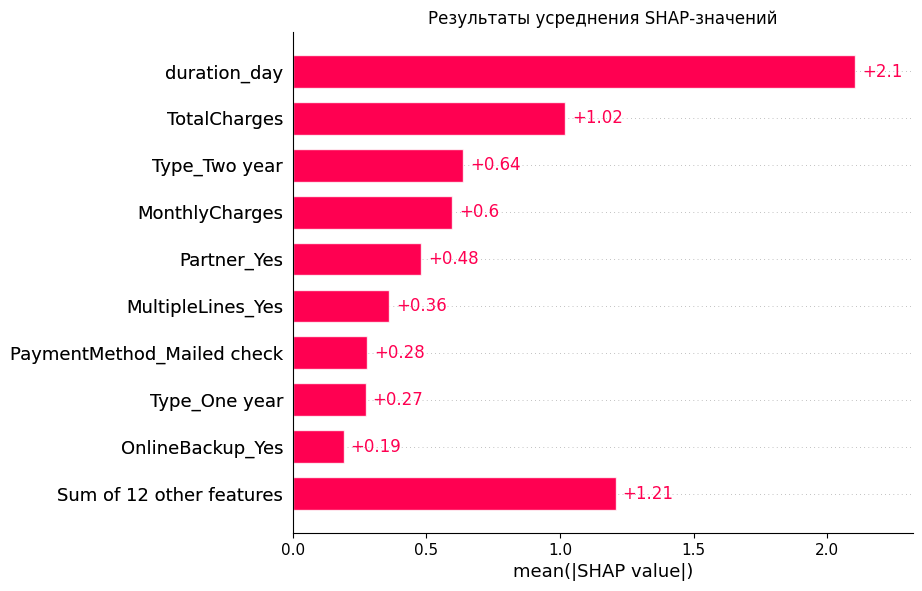

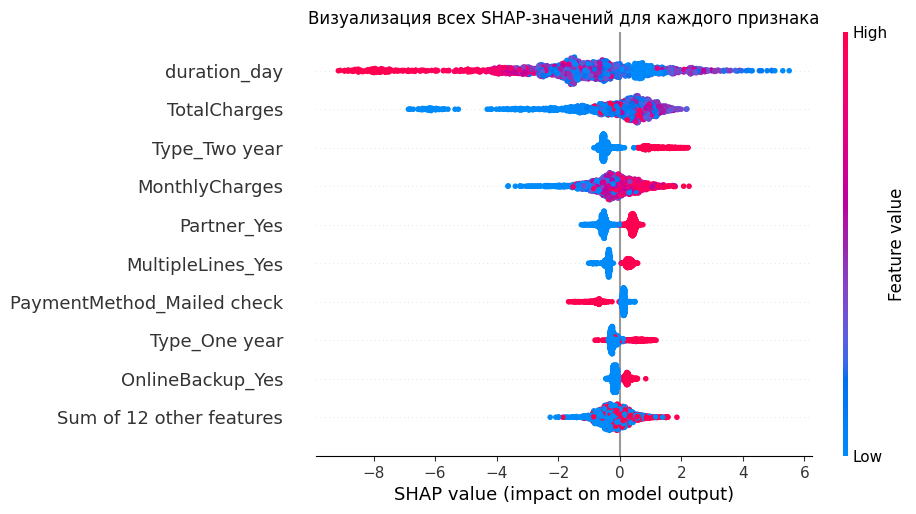

In [95]:
# Инициализация "explainer" для тестируемой модели
explainer = shap.TreeExplainer(test_model)
# Получение значений Шепли
test_shap_values = explainer(features_test_ohe)
# Построение столбчатого графика усреднения значений Шепли
plt.title('Результаты усреднения SHAP‑значений');
shap.plots.bar(test_shap_values)
# Построение графика визуализации всех значений Шепли
plt.title('Визуализация всех SHAP‑значений для каждого признака');
shap.plots.beeswarm(test_shap_values)

**Замечание:**  На первом (столбчатом) графике мы показали усреднённые значения Шепли для каждого признака.
На втором (`beeswarm`) графике видны все значения Шепли в виде точки, также для каждого признака.
Наибольшее влияние на предсказания модели оказывают признаки: `duration_day`, `TotalCharges`, `MonthlyCharges`, `Type_One year`. Заметим, что они имеют самую большую нелинейную корреляцию с целевым признаком (смотри пункт 3.2).   

Результаты `shap` похожи с `permutation_importance`. Однако с помощью `shap` мы можем начать понимать природу взаимоотношений между признаками и прогнозными решениями модели.  
Например, в случае с признаком `TotalCharges`, видно, что `shap‑значения` падают по мере падения значений признака (общие траты клиента). Это указывает на то, что низкое значение `TotalCharges` соответствуют низкой вероятности оттока клиента.

**Также с помощью `shap` мы можем узнать влияние признаков для каждого отдельного предсказания модели.**

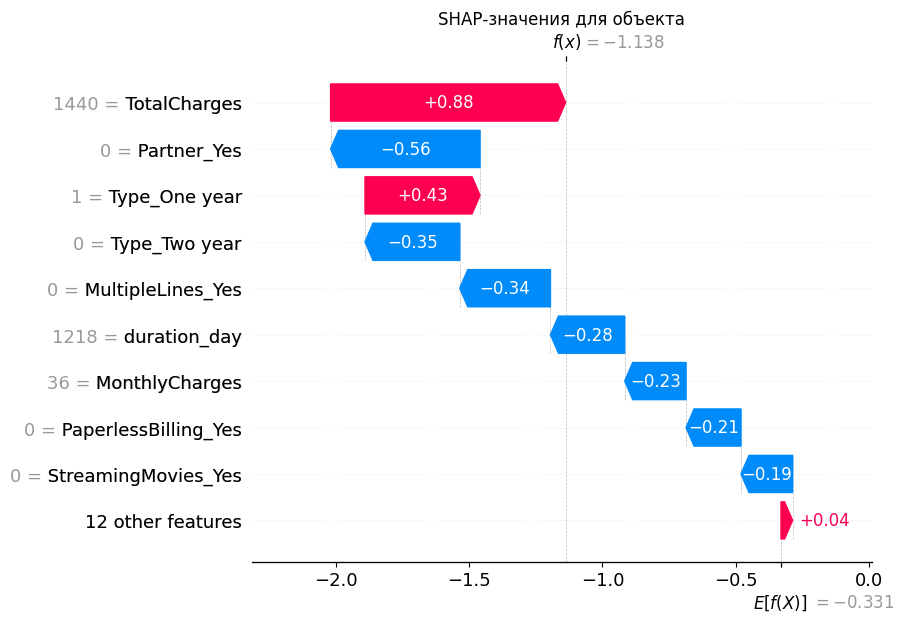

In [96]:
# Визуализация SHAP-значений для объекта №120
plt.title('SHAP‑значения для объекта');
shap.plots.waterfall(test_shap_values[120])

**Замечание:**  Здесь мы видим влияние признаков на предсказания модели для 120 объекта тестовой выборки.
Легко заметить, что значение признака `TotalCharges = 1440` оказывает наибольшее, причём в сторону принятия решения модели о возможном "оттоке" клиента (метка класса 1). А признаки `Partner_Yes = 0`, `Type_One year = 0`, `MultipleLines_Yes = 0` наоборот двигают модель в сторону принятия решения о не "оттоке" клиента (метка класса 0).

### Посмотрим как откалиброванна итоговая модель.

Для сравнения сразу же откалибруем иоговую модель и сохраним результат в отдельную переменную.

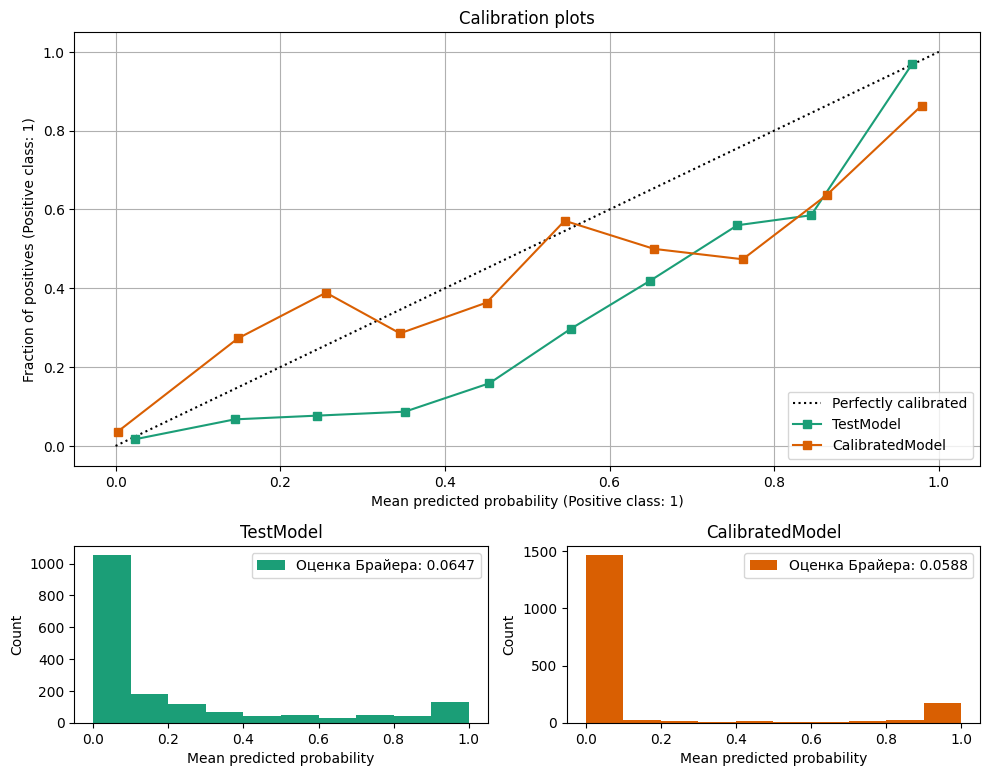

In [97]:
# Калибровка модели
calibrated_model = CalibratedClassifierCV(test_model, cv='prefit', method='sigmoid')
# Обучение откалиброванной модели
calibrated_model.fit(features_train_ohe, target_train)
# Создание списка исследуемых моделей
clf_list = [(test_model, "TestModel"),
            (calibrated_model, "CalibratedModel")]
# Разбиение всего пространство фигуры на строки и столбцы
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")
# Определение позиции графика калибровочных кривых в общем пространстве фигуры
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
# Построение калибровочных кривых для разных моделей и рассчёт оценки Брайера
calibration_displays = {}
brier_score = {}
for i, (clf, name) in enumerate(clf_list):
    display_сurve = CalibrationDisplay.from_estimator(clf,
                                                      features_test_ohe,
                                                      target_test,
                                                      n_bins=10,
                                                      name=name,
                                                      ax=ax_calibration_curve,
                                                      color=colors(i))
    # Рассчёт вероятностей классов
    prob_pos = clf.predict_proba(features_test_ohe)[:, 1]
    # Рассчёт оценки Брайера
    b_score = brier_score_loss(target_test, prob_pos)
    calibration_displays[name] = display_сurve
    brier_score[name] = b_score
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
# Определение позиций гистограмм в общем пространстве фигуры
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
# Построение гистограмм вместе оценкой Брайера
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    ax.hist(calibration_displays[name].y_prob,
            range=(0, 1),
            bins=10,
            label=f'Оценка Брайера: {round(brier_score[name], 4)}',
            color=colors(i))
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
    plt.legend(loc=1)
plt.tight_layout()
plt.show()

In [98]:
# Получение предсказаний модели
predict_calibrated = calibrated_model.predict(features_test_ohe)
# Рассчёт метрики качества модели
roc_auc_calibrated = roc_auc_score(target_test, predict_calibrated)
print(f'AUC-ROC калиброванной модели: {roc_auc_calibrated}')

AUC-ROC калиброванной модели: 0.8425552691196001


**Замечание:** На тестовой выборке оценка Брайера стала хуже для итоговой модели. Модель стала менее уверенно предсказывать значения, что вполне логично.   
Мы попробовали откалибровать нашу модель. После этого модель стала меньше предсказывать вероятности между 0 и 1. Оценка Брайера улучшилась.  
Однако, качество модели (метрика `AUC-ROC`) после калибровки снизилось (как мы и предполагали ранее). Поэтому калибровку итоговой модели проводить не целесообразно.

**Вывод:** 

Метрика качества `AUC-ROC` превышает заданную по условию. Проверка модели на адекватность пройдена. Калибровка модели не приводит к увеличению целевой метрики, значит в ней нет необходимости. Итоговая модель `CatBoostClassifier` соответствует требованиям заказчика.

Также выполнен анализ важности признаков для работы итоговой модели. С его помощью можно интерпретировать работу модели и в дальнейшем попытаться её оптимизировать. Например, можно удалить наименее важные признаки из обучающих данных. Также можно использовать этот анализ для принятия бизнес - решений. Например, можно обратить внимание на один из признаков, наиболее сильно влияющих на уход клиента.

## Итоговый вывод

В данном проекте мы построили модель машинного обучения для прогнозирования оттока клиентов оператора связи  «Ниединогоразрыва.ком», на основе исторических данных. 

**Этапы выполнения проекта:**
<ol>
    
<li> Изучение данных</li>
Здесь мы установили и импортировали необходимые для работы библиотеки, загрузили и изучили данные. 
      
<li> Предобработка данных</li>
На данном этапе мы объединили данные в одну таблицу, преобразовали их типы и заполнили пропуски. Для дальнейшей работы мы сгенерировали новые признаки.

<li> Исследовательский анализ данных</li>
На этой стадии проекта мы рассчитали корреляцию признаков, изучили их распределения и искали зависимости между ними.
    
<li> Подготовка данных</li>
Тут мы выделили необходимые для работы моделей признаки (в том числе целевой "customer_leave"). После этого разделили данные на выборки (соотношение 75:25), выполнили кодирование категориальных признаков и провели масштабирование. 
    
<li> Построение и анализ моделей</li>
Были рассмотрены следующие типы моделей: LogisticRegression, RandomForestClassifier, LightGBM Classifier, CatBoostClassifier.  
    
<li> Проверка "лучшей" модели</li>
На последнем этапе мы проверили "лучшую" модель на тестовой выборке, а также провели проверку на адекватность, оценили важность признаков и насколько откалиброванна итоговая модель.
    
    
</ol>


**В итоге:**  
Лучший результат показала модель CatBoostClassifier. Качество нашей модели на тестовой выборке (AUC-ROC= 0,86683) удовлетворяет требованиям заказчика.
Гиперпараметры модели: `learning_rate = 0.28855999420581974`,
                       `depth = 3`,
                       `iterations = 737`,
                       `auto_class_weights = 'Balanced'`.
Цель проекта достигнута.

# Отчет по проделанной работе

Целью проекта было построение модели машинного обучения для прогнозирования оттока клиентов.  
Метрика качества работы модели: ROC-AUC. Она должна быть больше или равна 0,85.


**После изучения данных, была проведена предобработка данных.**      

**Этапы предобработки:**   
1. Объединение 4 таблиц с данными в одну.        
2. Преобразование типов данных.    
   Столбцы с датами `BeginDate` и `EndDate` были преобразованны в тип `datetime`, столбец `TotalCharges` во `float64`, а `CeniorCitizen` в `object`.  
   Очевидно что признак `CeniorCitizen` категориальный, поэтому мы заменили значения 0 и 1 на "No" и "Yes" , по подобию заполнения значений в остальных бинарных категориальных признаках.    
3. Поиск и обработка дубликатов.   
   Явных дубликатов в данных не было, так как в столбце `CustomerID` все значения уникальны. Было найдено 8 неявных дубликатов. По ним можно уточнить данные у заказчика. Так как признаков не много, эти данные могли просто совпасть для разных клиентов. Эти строки из наших данных удалены не были.     
4. Заполнение пропущенных значений.   
   После объединения таблиц образовались пропуски. Для тех клиентов о которых нет данных по услугам в соответствующих полях появились значения "Nan".       
   У заказчика нам удалось выяснить, что у нас есть клиенты, которые пользуются только интернетом или только телефоном, либо обеими услугами. Если в столбце `MultipleLine`s указано "No", значит клиент пользуется телефоном, но не подключил многоканальную связь. Поэтому пропуски здесь мы заполнили значением "no_phone".     
   Аналогично пропуски в столбце `InternetService` заполнили значением "no_internet".     
   Пропуски в остальных столбцах заполнили значением "No".    
5. Поиск и обработка аномальных значений.   
   Здесь нам не удалось выделить никаких показателей.     
6. Определение целевого признака.   
   В столбце `EndDate` мы заменили значения с "No" на "2020-02-01" (это дата выгрузки). Это было сделано для генерации нового признака и удобства анализа.      
   На основе значений столбца `EndDate` мы создали целевой признак `customer leave`, где дата "2020-02-01" означает клиент не ушёл (соответствует значению 0) и все остальные даты - клиент ушёл (соответствует значению 1).    
7. Создание новых признаков.   
   Для улучшения качества прогноза модели мы добавили в таблицу информацию о том, какое врямя человек является или являлся клиентом "телеком" компании. Для этого из конечной даты `EndDate` вычли дату заключения договора с клиентом `BeginDate`. Получили признак `duration_day` - длительность взаимоотношений клиента с компанией в днях.       

**Далее в проекте, в ходе исследовательского анализа данных, мы нашли сильные корреляционные связи в некоторых признаках.**
В итоге, мы приняли решения отказаться от следующих признаков в работе нашей модели: `customerID`, `BeginDate`, `EndDate`, `InternetService`. Из-за признаков дат происходила утечка данных, а на данных об интернет-услугах  модель переобучалась, ввиду сильной связи с признаком `MonthlyCharges`. Также был обнаружен дисбаланс классов целевого признака. Борьбу с ним мы проводили с помощью встроенных методов в моделях машинного обучения.

**На этапе подготовки данные были разбиты на тренировочную и тестовую выборки в стоотношении 75:25.** 
Также категориальные признаки были закодированны методом OHE. 
Так как итоговая "лучшая модель" это `CatboostClassifier`, то кодирование можно не производить, а воспользоваться методами библиотеки `Catboost`. То же касается и масштабирования признаков. Оно было выполненно для проверки работы модели логистической регрессии (это линейная модель).

**При исследовании моделей и подготовке данных была использованна костанта random_state = 220523.**
В ходе исследования моделей, использовалась основная метрика `roc-auc`, а также дополнительные: `accuracy`, `precision` и `recall`. Кроме того была построена `матрица ошибок` и `roc-кривая`. Модели проверялись методом кросс-валидации. Гиперпараметры подбирались с помощью модуля `optuna`. Также были построены кривые обучения, графики важности признаков и калибровочные кривые. 

**На последнем этапе была выполнена проверка "лучшей" модели на тестовой выборке, проверка ее на адекватность, оценка важности признаков. Также мы попробовали откалибровать нашу итоговую модель.**



**Итоговая модель**  
`CatBoostClassifier` с гиперпараметрами:   
`learning_rate = 0.28855999420581974` ,`depth = 3`,`iterations = 737`, `auto_class_weights = 'Balanced'`

**Итоговая метрика на тестовой выборке: `AUC-ROC = 0,86683`**

**Целевой признак:**  
`customer_leave` 

**Признаки для обучения модели:**  
`Type`,  
`PaperlessBilling`,  	
`PaymentMethod`,  
`MonthlyCharges`,  
`TotalCharges`,  
`gender`,  
`SeniorCitizen`,  	
`Partner`,  
`Dependents`,  
`MultipleLines`,  
`OnlineSecurity`,  
`OnlineBackup`,  
`DeviceProtection`,  
`TechSupport`,  
`StreamingTV`,  
`StreamingMovies`,  
`duration_day`.

**Цель проекта достигнута.**